In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import unicodedata
# from unidecode import unidecode
import warnings
warnings.filterwarnings("ignore")

In [2]:
contract_df = pd.read_csv(r'cleaned_data/CONTRACT.csv')
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280377 entries, 0 to 4280376
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SKP_CREDIT_CASE        int64  
 1   SKP_CLIENT             int64  
 2   NAME_EDUCATION_TYPE    object 
 3   CNT_CHILDREN           int64  
 4   AMT_INCOME_MAIN        float64
 5   AMT_INCOME_HOUSEHOLD   int64  
 6   NAME_INCOME_TYPE       object 
 7   CODE_PROFESSION        object 
 8   NAME_CREDIT_STATUS     object 
 9   PRODUCT                object 
 10  AMT_CREDIT             float64
 11  PAYMENT_NUM            float64
 12  INIT_PAY               float64
 13  ANNUITY                float64
 14  APPLY_CONTRACT_TIME    object 
 15  APPROVE_CONTRACT_TIME  object 
 16  SIGN_CONTRACT_TIME     object 
 17  APPLY_EMPLOYEE         int64  
 18  SIGN_EMPLOYEE          int64  
 19  FIRST_DUE              int64  
 20  SECOND_DUE             int64  
 21  THIRD_DUE              int64  
 22  FOURTH_DUE        

In [3]:
contract_df

,SKP_CREDIT_CASE,SKP_CLIENT,NAME_EDUCATION_TYPE,CNT_CHILDREN,AMT_INCOME_MAIN,AMT_INCOME_HOUSEHOLD,NAME_INCOME_TYPE,CODE_PROFESSION,NAME_CREDIT_STATUS,PRODUCT,...,APPLY_CONTRACT_TIME,APPROVE_CONTRACT_TIME,SIGN_CONTRACT_TIME,APPLY_EMPLOYEE,SIGN_EMPLOYEE,FIRST_DUE,SECOND_DUE,THIRD_DUE,FOURTH_DUE,FLAG_INS
0,199270422,3489209,XNA,0,9000000.0,0,XNA,XNA,Rejected,Consumer Durable,...,2020-01-21 11:05:16,NaN,NaN,-1,-1,0,0,0,0,0
1,199467152,62216381,Bachelor's degree,0,10000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,2020-01-23 21:16:52,2020-01-23 21:19:41,2020-01-23 21:31:32,-1,-1,0,0,0,0,1
2,202732373,12665970,Bachelor's degree,0,7000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,2020-03-06 21:25:19,2020-03-06 21:28:01,2020-03-06 21:30:53,23074,23074,0,0,0,0,1
3,203031337,38026388,Elementary (primary) school,0,7000000.0,0,Employed person,WORKER,Finished,Consumer Durable,...,2020-03-10 19:33:37,2020-03-10 19:36:53,2020-03-10 19:37:27,-1,-1,0,0,0,0,1
4,149179096,14975594,Elementary (primary) school,1,4000000.0,0,Employed person,SALESMAN,Finished,Consumer Durable,...,2019-01-31 19:09:53,2019-01-31 19:11:02,2019-01-31 21:46:12,20815,31089,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280372,342935768,77354359,High school education,0,15000000.0,0,Employed person,ADMINISTRATIVE,Active,Cash Loan,...,2025-06-04 11:15:56,2025-06-04 11:19:56,2025-06-04 11:25:57,-1,-1,0,0,0,0,0
4280373,342935857,20795524,High school education,0,12000000.0,0,Employed person,WORKER,Active,Credit Card,...,2025-06-04 16:17:23,2025-06-04 16:18:00,2025-06-04 16:18:25,-1,-1,0,0,0,0,1
4280374,342935889,14994675,High school education,0,50000000.0,0,Employed person,OTHER,Active,Cash Loan,...,2025-06-04 13:41:32,2025-06-04 14:20:52,2025-06-04 14:27:19,33883,33883,0,0,0,0,1
4280375,342936178,67269333,High school education,0,20000000.0,0,Self-employed person / business owner,OTHER,Active,Cash Loan,...,2025-06-04 11:43:25,2025-06-04 11:46:40,2025-06-04 11:47:02,-1,-1,0,0,0,0,0


In [4]:
customer_df = pd.read_csv(r'cleaned_data/CUSTOMER.csv')
customer_df

,SKP_CLIENT,NAME_GENDER,NAME_EDUCATION_TYPE,DATE_BIRTH,CNT_CHILDREN,NAME_SALARY_FREQUENCY,CNT_PERSON_DEPENDENT,AVG_SESSION_PER_WEEK_2025,AGE_CLIENT,CLIENT_PROVINCE
0,676,Female,High school education,1966-03-18,0.0,XNA,-1.0,0.0,59,Long An
1,1470,Male,High school education,1967-12-27,1.0,XNA,-1.0,0.0,57,TP Ho Chi Minh
2,7123,Male,Junior school education,1972-10-03,2.0,XNA,6.0,0.0,52,Dak Lak
3,10711,Female,Elementary (primary) school,1978-01-01,1.0,XNA,1.0,0.0,47,Tien Giang
4,12407,Male,High school education,1986-03-14,1.0,XNA,-1.0,0.0,39,Gia Lai
...,...,...,...,...,...,...,...,...,...,...
1000523,126809534,Male,XNA,1990-04-02,0.0,XNA,-1.0,0.0,35,0
1000524,127462754,Male,XNA,2005-04-30,-1.0,XNA,-1.0,0.0,20,0
1000525,126394510,Male,XNA,1995-07-24,0.0,XNA,-1.0,0.0,29,0
1000526,118415150,Female,XNA,2000-05-09,-1.0,XNA,-1.0,0.0,25,0


In [5]:
employee_df = pd.read_csv(r'cleaned_data/EMPLOYEE.csv')
employee_df

,CODE_EMPLOYEE,HIRING_DATE,LEAVING_DATE,MANAGER_CODE_EMPLOYEE,GENDER,BIRTH_DATE,LEVEL_SA,WORKING_DAYS,AGE_EMPLOYEE_HIRED,AGE_EMPLOYEE,SA_PROVINCE,FLAG_MANAGER
0,46911,2021-01-04,2021-10-01,115169,Female,2001-11-28,XNA,270,19,23,Ninh Thuan,False
1,46945,2021-01-11,2021-07-26,35377,Female,1999-12-23,XNA,196,21,25,Dong Nai,False
2,47297,2021-02-22,2024-03-13,115717,Female,1999-06-10,JUNIOR,1115,21,26,TP Ho Chi Minh,False
3,47428,2021-03-01,2021-04-11,2101,Female,1998-10-10,XNA,41,22,26,Binh Thuan,False
4,47435,2021-03-01,2021-11-11,115642,Female,1988-02-18,XNA,255,33,37,TP Ho Chi Minh,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11378,118286,2013-07-24,2021-09-19,120745,Female,1992-11-05,XNA,2979,20,32,Thai Binh,False
11379,120002,2013-10-14,2022-06-01,17466,Female,1992-05-01,XNA,3152,21,33,Dong Thap,False
11380,120825,2013-11-27,2021-08-15,23979,Female,1991-03-26,XNA,2818,22,34,TP Ho Chi Minh,False
11381,121209,2013-12-16,NaN,16010,Male,1988-03-11,JUNIOR,4195,25,37,Dong Thap,False


In [6]:
leads_df = pd.read_csv(r'cleaned_data/LEADS.csv')
rtdm_count = (leads_df['LEAD_SOURCE'] == 'RTDM').sum()
print(f"Số lượng RTDM: {rtdm_count}")

Số lượng RTDM: 2027606


In [7]:
shop_df = pd.read_csv(r'cleaned_data/SHOP.csv')
shop_df

,CODE_POS,SALESROOM_PROVINCE
0,410163,Hai Phong
1,400714,Nghe An
2,240068,Binh Phuoc
3,170525,Kien Giang
4,540196,Lao Cai
...,...,...
64338,121362,An Giang
64339,121361,An Giang
64340,300501,Bac Lieu
64341,15026,TP Ho Chi Minh


In [8]:
final_df = contract_df.merge(customer_df, on='SKP_CLIENT', how='inner')
final_df

,SKP_CREDIT_CASE,SKP_CLIENT,NAME_EDUCATION_TYPE_x,CNT_CHILDREN_x,AMT_INCOME_MAIN,AMT_INCOME_HOUSEHOLD,NAME_INCOME_TYPE,CODE_PROFESSION,NAME_CREDIT_STATUS,PRODUCT,...,FLAG_INS,NAME_GENDER,NAME_EDUCATION_TYPE_y,DATE_BIRTH,CNT_CHILDREN_y,NAME_SALARY_FREQUENCY,CNT_PERSON_DEPENDENT,AVG_SESSION_PER_WEEK_2025,AGE_CLIENT,CLIENT_PROVINCE
0,199270422,3489209,XNA,0,9000000.0,0,XNA,XNA,Rejected,Consumer Durable,...,0,Male,Elementary (primary) school,1980-08-03,0.0,Irregular salary frequency,-1.0,0.00,44,TP Ho Chi Minh
1,199467152,62216381,Bachelor's degree,0,10000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,1,Male,Master's degree,1973-05-26,2.0,XNA,-1.0,0.00,52,Khanh Hoa
2,202732373,12665970,Bachelor's degree,0,7000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,1,Female,Bachelor's degree,1992-07-11,1.0,XNA,-1.0,0.00,32,Phu Tho
3,203031337,38026388,Elementary (primary) school,0,7000000.0,0,Employed person,WORKER,Finished,Consumer Durable,...,1,Female,Elementary (primary) school,1975-02-11,2.0,XNA,-1.0,0.00,50,TP Ho Chi Minh
4,149179096,14975594,Elementary (primary) school,1,4000000.0,0,Employed person,SALESMAN,Finished,Consumer Durable,...,1,Female,High school education,1991-08-21,2.0,XNA,-1.0,0.00,33,Khanh Hoa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280372,342935768,77354359,High school education,0,15000000.0,0,Employed person,ADMINISTRATIVE,Active,Cash Loan,...,0,Male,Master's degree,1972-03-26,2.0,XNA,-1.0,0.00,53,Khanh Hoa
4280373,342935857,20795524,High school education,0,12000000.0,0,Employed person,WORKER,Active,Credit Card,...,1,Male,High school education,1993-10-03,0.0,XNA,-1.0,0.00,31,Thanh Hoa
4280374,342935889,14994675,High school education,0,50000000.0,0,Employed person,OTHER,Active,Cash Loan,...,1,Male,High school education,1976-01-01,0.0,XNA,-1.0,0.00,49,TP Ho Chi Minh
4280375,342936178,67269333,High school education,0,20000000.0,0,Self-employed person / business owner,OTHER,Active,Cash Loan,...,0,Male,Bachelor's degree,1993-08-22,0.0,XNA,-1.0,0.00,31,TP Ho Chi Minh


In [9]:
final_df = final_df.merge(employee_df, left_on='APPLY_EMPLOYEE', right_on='CODE_EMPLOYEE', how='inner')
final_df

,SKP_CREDIT_CASE,SKP_CLIENT,NAME_EDUCATION_TYPE_x,CNT_CHILDREN_x,AMT_INCOME_MAIN,AMT_INCOME_HOUSEHOLD,NAME_INCOME_TYPE,CODE_PROFESSION,NAME_CREDIT_STATUS,PRODUCT,...,LEAVING_DATE,MANAGER_CODE_EMPLOYEE,GENDER,BIRTH_DATE,LEVEL_SA,WORKING_DAYS,AGE_EMPLOYEE_HIRED,AGE_EMPLOYEE,SA_PROVINCE,FLAG_MANAGER
0,202732373,12665970,Bachelor's degree,0,7000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,2023-11-29,26872,Female,1985-03-24,SENIOR,2969,30,40,Phu Tho,False
1,149179096,14975594,Elementary (primary) school,1,4000000.0,0,Employed person,SALESMAN,Finished,Consumer Durable,...,2022-11-30,19780,Female,1992-08-03,MASTER,2800,22,32,Khanh Hoa,True
2,335925533,126826775,XNA,0,2000000.0,0,XNA,XNA,Rejected,Consumer Durable,...,NaN,889,Female,1989-11-15,MASTER,2633,28,35,TP Ho Chi Minh,False
3,163357328,38084937,Junior school education,0,5000000.0,0,Employed person,WORKER,Finished,Consumer Durable,...,2021-01-01,34590,Female,1994-06-30,XNA,1473,22,30,Thanh Hoa,False
4,193688464,37761042,Bachelor's degree,0,10000000.0,0,Employed person,OTHER,Finished,Consumer Durable,...,2021-04-13,1406,Female,1992-07-10,XNA,1624,24,32,Hung Yen,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900896,342934673,99124783,Junior school education,1,25000000.0,0,Employed person,SALESMAN,Signed,Cash Loan,...,NaN,114569,Female,1988-06-01,WARRIOR,1458,33,37,Long An,False
900897,342934791,6409762,Elementary (primary) school,2,15000000.0,0,Self-employed person / business owner,OTHER,Signed,Cash Loan,...,NaN,109522,Male,2002-02-23,WARRIOR,1311,19,23,Bac Lieu,False
900898,342935412,37676700,Elementary (primary) school,1,15000000.0,0,Employed person,WORKER,Signed,Two-wheelers,...,NaN,1428,Male,2000-08-17,JUNIOR,261,24,24,TP Ho Chi Minh,False
900899,342935765,7514929,Junior school education,0,20000000.0,0,Self-employed person / business owner,ENGINEER,Approved,Cash Loan,...,NaN,248,Male,1991-04-22,SENIOR,268,33,34,Long An,False


# **[B. DATA ANALYST AND VISUALIZATION]**

# **I. Visualization** #

### **Univariate**

#### **1.1. Contract Table**

##### 1.1.1 `SKP_CLIENT`

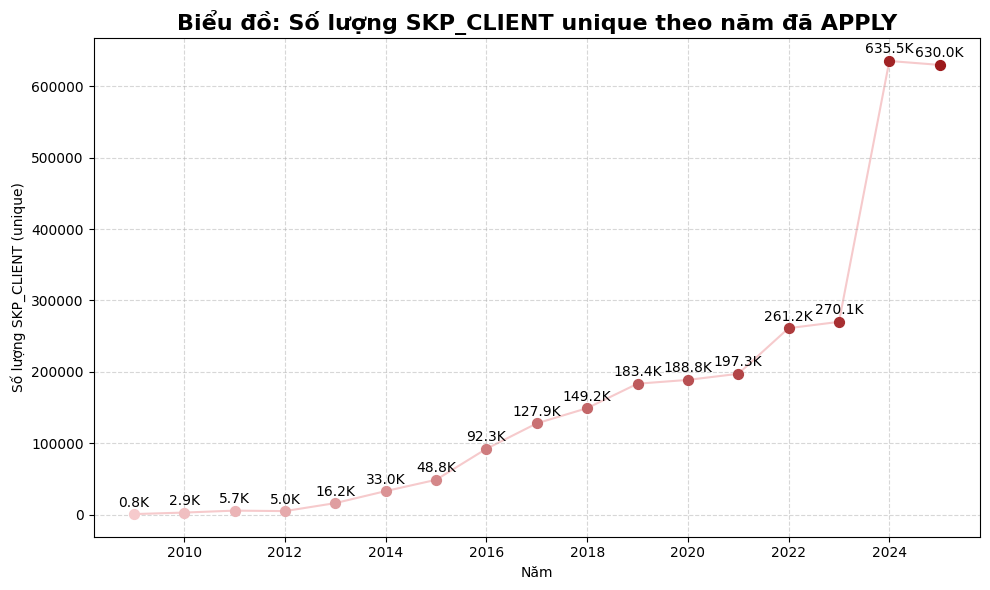

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Làm sạch tên cột (nếu cần)
contract_df.columns = contract_df.columns.str.strip().str.upper()

# Chuyển APPLY_CONTRACT_TIME thành datetime (nếu chưa)
contract_df['APPLY_CONTRACT_TIME'] = pd.to_datetime(contract_df['APPLY_CONTRACT_TIME'], errors='coerce')

# Trích xuất NĂM
contract_df['YEAR'] = contract_df['APPLY_CONTRACT_TIME'].dt.year

# Đếm số khách hàng duy nhất theo từng năm
yearly_clients = contract_df.groupby('YEAR')['SKP_CLIENT'].nunique()

# Tạo bảng màu
cmap = LinearSegmentedColormap.from_list("custom_reds", ['#F6CACC', '#9C191B'])
colors = cmap(np.linspace(0, 1, len(yearly_clients)))
label_padding = max(yearly_clients.values) * 0.01

# Vẽ line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_clients.index, yearly_clients.values, color='#F6CACC', linewidth=1.5, zorder=1)

# Thêm chấm và nhãn giá trị
for (x, y, color) in zip(yearly_clients.index, yearly_clients.values, colors):
    plt.scatter(x, y, color=color, s=50, zorder=2)
    plt.text(x, y + label_padding, f'{y/1000:.1f}K', ha='center', va='bottom', fontsize=10)

# Tùy chỉnh biểu đồ
plt.title('Biểu đồ: Số lượng SKP_CLIENT unique theo năm đã APPLY', fontsize=16, fontweight='bold')
plt.xlabel('Năm')
plt.ylabel('Số lượng SKP_CLIENT (unique)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1.1.2 `AMT_INCOME_MAIN`

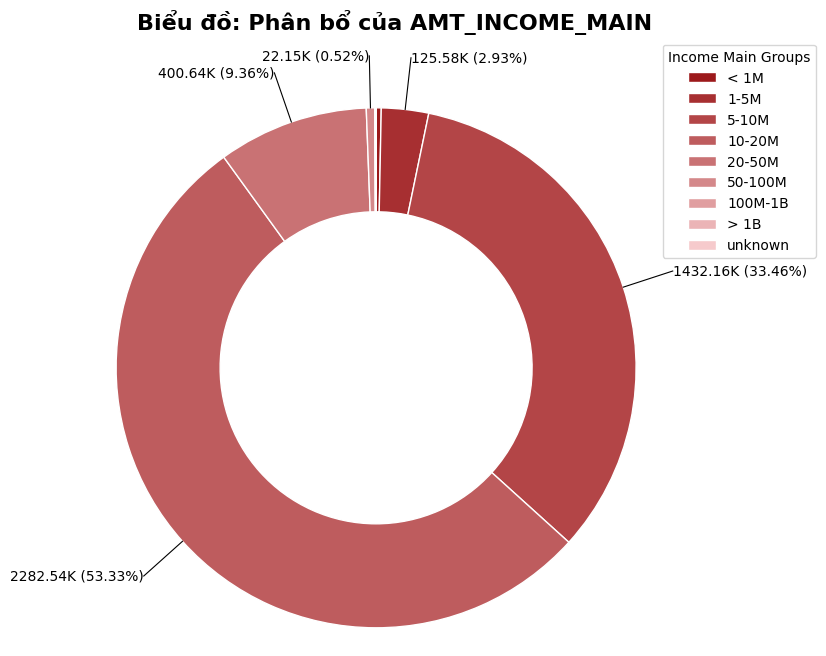

In [11]:
# Define age bins and corresponding labels 
bins = [-float('inf'), 0, 1_000_000, 5_000_000, 10_000_000, 20_000_000, 50_000_000, 100_000_000, 1_000_000_000, float('inf')]
labels = ['unknown', '< 1M', '1-5M', '5-10M', '10-20M', '20-50M', '50-100M', '100M-1B', '> 1B']

# Categorize ages into defined age groups with a specified order
contract_df['INCOME_MAIN_GROUP'] = pd.cut(
    contract_df['AMT_INCOME_MAIN'],
    bins=bins,
    labels=pd.Categorical(labels, ordered=True),
    right=False)

# Count the number of users in each age group, preserving label order
# Sắp xếp theo labels gốc, nhưng đưa 'unknown' về cuối
ordered_labels = [l for l in labels if l != 'unknown'] + ['unknown']
income_main_counts = contract_df['INCOME_MAIN_GROUP'].value_counts().reindex(ordered_labels)

# Calculate total users, then format labels showing both count and percentage
total = income_main_counts.sum()
percentages = income_main_counts / total * 100
labels_with_values = [
    f'{count/1000:.2f}K ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(income_main_counts, percentages)
]

# Create palette
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(income_main_counts)))

# Draw pie chart
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    income_main_counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Draw lines connecting each wedge to its external label
outer_radius = 1
for i, (wedge, label) in enumerate(zip(wedges, labels_with_values)):
    if label == '':
        continue 

    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)

    x_end = 1.2 * outer_radius * np.cos(angle_rad)
    y_end = 1.2 * outer_radius * np.sin(angle_rad)

    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'

    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Add a legend
ax.legend(
    wedges,
    income_main_counts.index,
    title="Income Main Groups",
    loc="upper right",
    bbox_to_anchor=(1.2, 1)
)

ax.set_title('Biểu đồ: Phân bổ của AMT_INCOME_MAIN', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


##### 1.1.3 `AMT_INCOME_HOUSEHOLD`

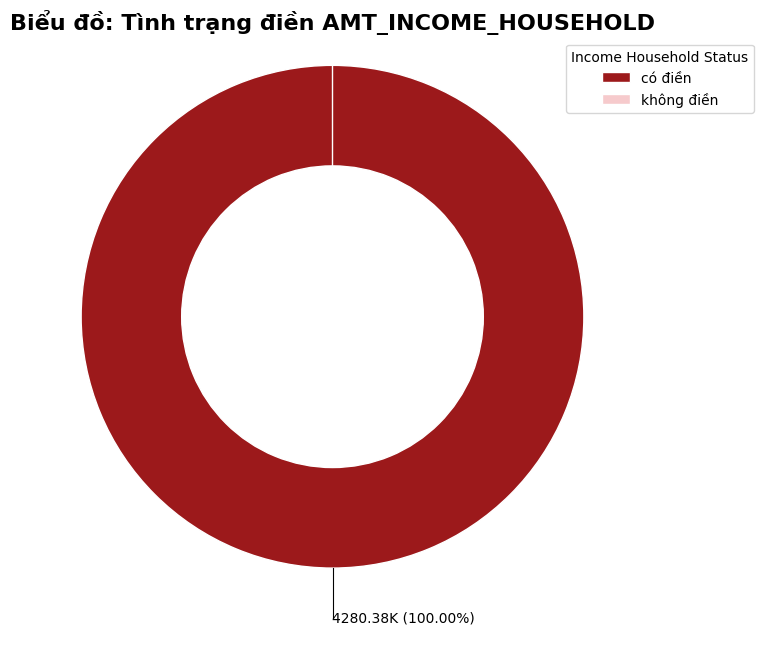

In [12]:
# Gộp nhóm theo có/không điền
contract_df['INCOME_HOUSEHOLD_GROUP'] = np.where(
    contract_df['AMT_INCOME_HOUSEHOLD'].notna(),
    'có điền',
    'không điền'
)

# Đếm số lượng theo từng nhóm
income_household_counts = contract_df['INCOME_HOUSEHOLD_GROUP'].value_counts()
income_household_counts = income_household_counts.reindex(['có điền', 'không điền']).fillna(0)


# Tính phần trăm
total = income_household_counts.sum()
percentages = income_household_counts / total * 100

# Hiển thị nhãn theo định dạng: Số lượng (Phần trăm)
labels_with_values = [
    f'{count/1000:.2f}K ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(income_household_counts, percentages)
]

# Tạo màu
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(income_household_counts)))

# Vẽ pie chart
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    income_household_counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Vẽ các đường nối và nhãn ngoài
outer_radius = 1
for i, (wedge, label) in enumerate(zip(wedges, labels_with_values)):
    if label == '':
        continue

    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)

    x_end = 1.2 * outer_radius * np.cos(angle_rad)
    y_end = 1.2 * outer_radius * np.sin(angle_rad)

    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'

    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Thêm chú thích
ax.legend(
    wedges,
    income_household_counts.index,
    title="Income Household Status",
    loc="upper right",
    bbox_to_anchor=(1.2, 1)
)

ax.set_title('Biểu đồ: Tình trạng điền AMT_INCOME_HOUSEHOLD', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


##### 1.1.4 `NAME_INCOME_TYPE`

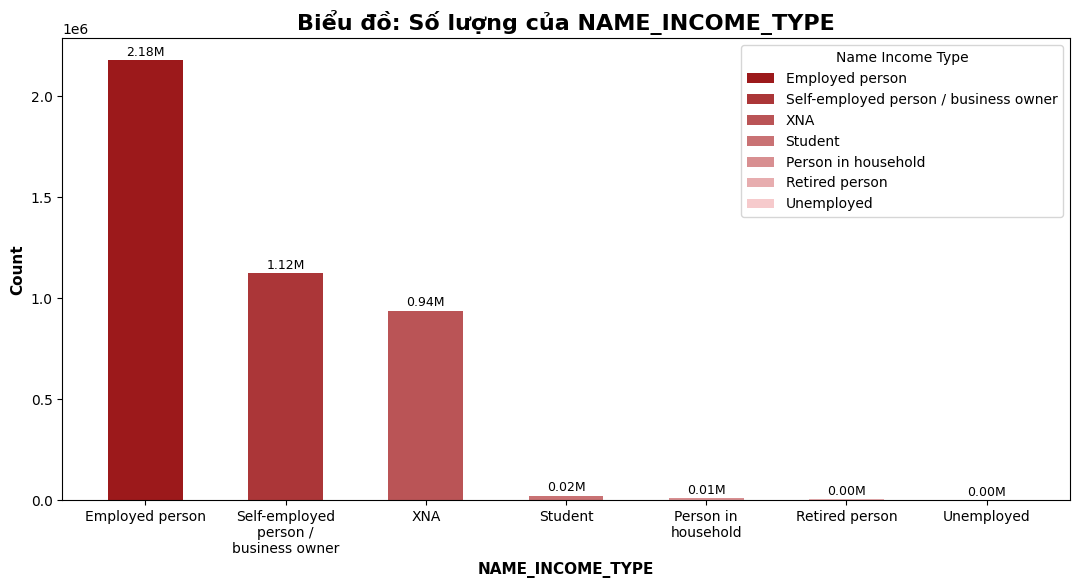

In [13]:
import textwrap

# Count the number of occurrences for each category in 'sex' column
name_income_counts = contract_df['NAME_INCOME_TYPE'].value_counts()
labels = name_income_counts.index
values = name_income_counts.values
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]

# Tính tổng và tạo nhãn định dạng "xxxK (xx.xx%)"
total = name_income_counts.sum()
labels_with_values = [
    f'{count / 1_000_000:.2f}M' for count in values
]

# Create positions for the bars, spacing them closely
x = np.arange(len(labels)) * 0.15

# Create palette
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(name_income_counts)))

# Draw bar chart
plt.figure(figsize=(13, 6))
bars = plt.bar(
    x,
    values,
    color=colors,
    width=0.08,
)

# Add a legend
plt.legend(
    bars,
    labels,  # vẫn dùng label gốc trong legend
    title="Name Income Type",
    loc="best"
)


plt.xticks(x, wrapped_labels)
plt.xlabel('NAME_INCOME_TYPE', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.title('Biểu đồ: Số lượng của NAME_INCOME_TYPE', fontsize=16, fontweight='bold')

# Add custom labels above each bar
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=9)

plt.show()


##### 1.1.5 `CODE_PROFESSION`

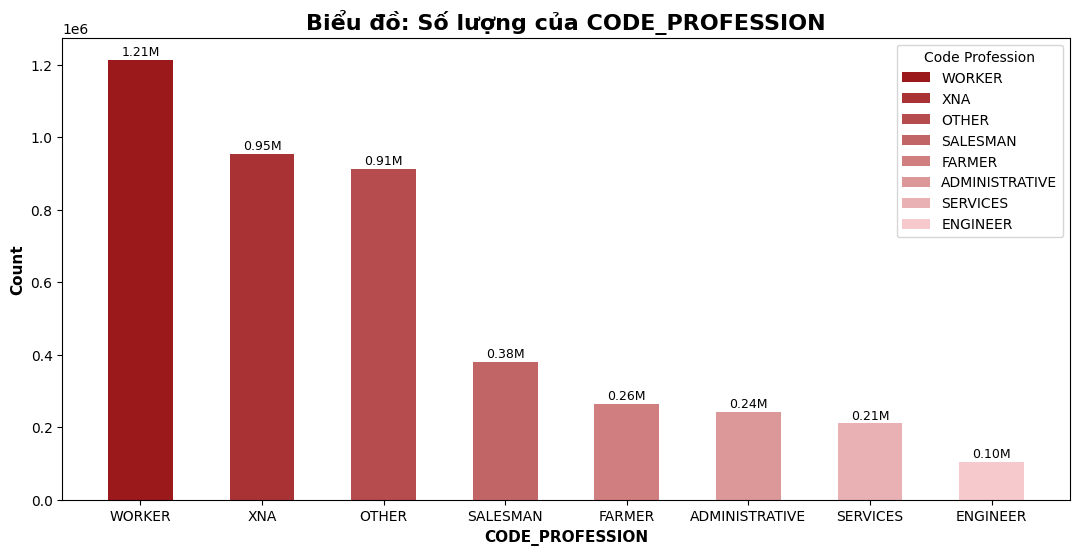

In [14]:
# Count the number of occurrences for each category in 'sex' column
code_profession_counts = contract_df['CODE_PROFESSION'].value_counts()
labels = code_profession_counts.index
values = code_profession_counts.values

# Tính tổng và tạo nhãn định dạng "xxxK (xx.xx%)"
total = code_profession_counts.sum()
labels_with_values = [
    f'{count / 1000000:.2f}M' for count in values
]

# Create positions for the bars, spacing them closely
x = np.arange(len(labels)) * 0.15

# Create palette
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(code_profession_counts)))

# Draw bar chart
plt.figure(figsize=(13, 6))
bars = plt.bar(
    x,
    values,
    color=colors,
    width=0.08,
)

# Add a legend
plt.legend(
    bars,
    labels,
    title="Code Profession",
    loc="best"
)

# Set the x-axis tick labels at bar positions
plt.xticks(x, labels)
plt.xlabel('CODE_PROFESSION', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.title('Biểu đồ: Số lượng của CODE_PROFESSION', fontsize=16, fontweight='bold')

# Add custom labels above each bar
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=9)

plt.show()


##### 1.1.6 `PRODUCT`

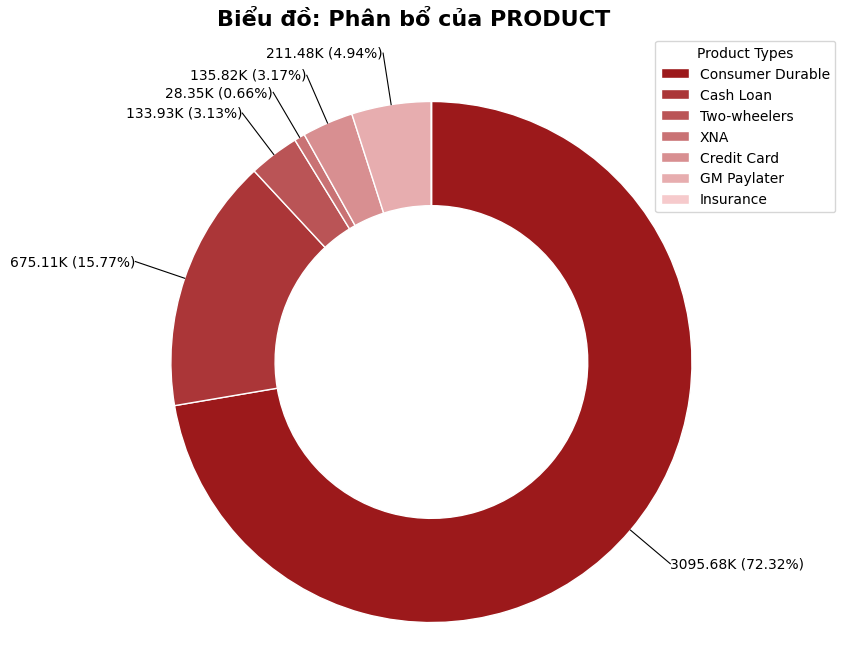

In [15]:
# Lấy danh sách labels từ dữ liệu ban đầu
labels = contract_df['PRODUCT'].dropna().unique().tolist()

# Đưa 'unknown' về cuối nếu có
ordered_labels = [l for l in labels if l != 'unknown'] + (['unknown'] if 'unknown' in labels else [])

# Đếm số lượng từng nhóm PRODUCT, sắp xếp theo ordered_labels
product_counts = contract_df['PRODUCT'].value_counts().reindex(ordered_labels).fillna(0)

# Tính tổng và phần trăm
total = product_counts.sum()
percentages = product_counts / total * 100
labels_with_values = [
    f'{count/1000:.2f}K ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(product_counts, percentages)
]

# Tạo màu cho từng nhóm (tùy chỉnh theo nhu cầu)
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(product_counts)))

# Vẽ pie chart
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    product_counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Vẽ đường nối và label ngoài
outer_radius = 1
for i, (wedge, label) in enumerate(zip(wedges, labels_with_values)):
    if label == '':
        continue 

    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)

    x_end = 1.2 * outer_radius * np.cos(angle_rad)
    y_end = 1.2 * outer_radius * np.sin(angle_rad)

    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'

    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Thêm chú thích
ax.legend(
    wedges,
    ordered_labels,
    title="Product Types",
    loc="upper right",
    bbox_to_anchor=(1.2, 1)
)

ax.set_title('Biểu đồ: Phân bổ của PRODUCT', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


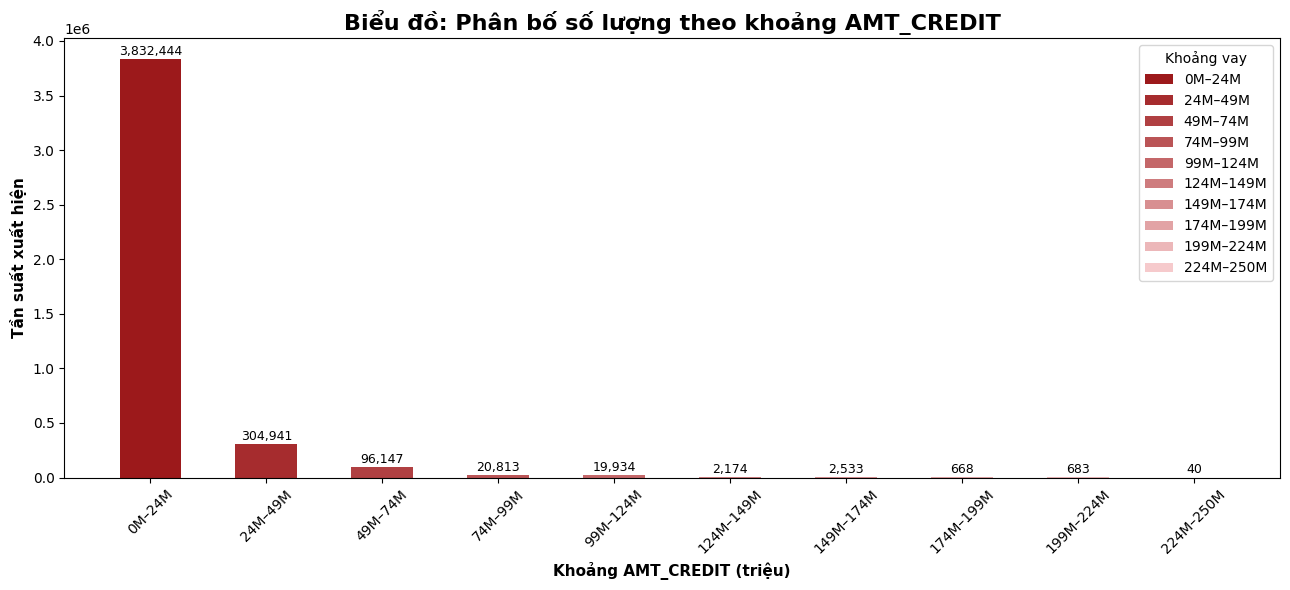

In [16]:

# Làm sạch tên cột
contract_df.columns = contract_df.columns.str.strip().str.upper()

# Chia AMT_CREDIT thành 10 khoảng đều nhau
contract_df['AMT_CREDIT_BIN'] = pd.cut(contract_df['AMT_CREDIT'], bins=10)

# Đếm số lần xuất hiện của mỗi bin
amt_credit_bin_counts = contract_df['AMT_CREDIT_BIN'].value_counts().sort_index()

# Lấy labels và values
labels = [f"{int(b.left/1_000_000)}M–{int(b.right/1_000_000)}M" for b in amt_credit_bin_counts.index]
values = amt_credit_bin_counts.values
x = np.arange(len(labels)) * 0.15

# Tạo bảng màu
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(values)))
labels_with_values = [f'{val:,}' for val in values]

# Vẽ biểu đồ
plt.figure(figsize=(13, 6))
bars = plt.bar(x, values, color=colors, width=0.08)

# Chú thích
plt.legend(bars, labels, title="Khoảng vay", loc="best")
plt.xticks(x, labels, rotation=45)
plt.xlabel('Khoảng AMT_CREDIT (triệu)', fontsize=11, fontweight='bold')
plt.ylabel('Tần suất xuất hiện', fontsize=11, fontweight='bold')
plt.title('Biểu đồ: Phân bố số lượng theo khoảng AMT_CREDIT', fontsize=16, fontweight='bold')

# Gắn nhãn số
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=9)

plt.tight_layout()
plt.show()


##### 1.1.7 `NAME_CREDIT_STATUS`

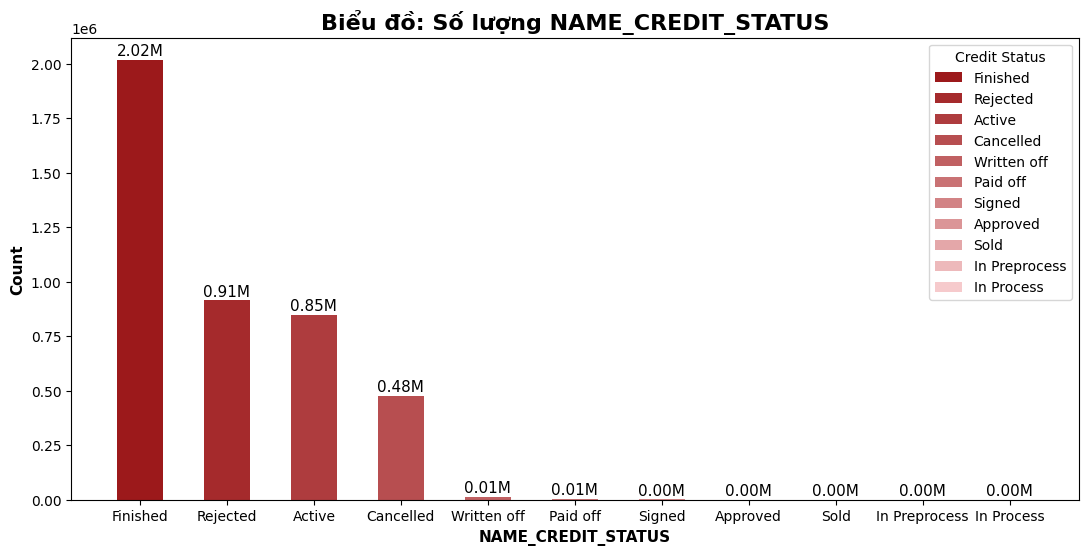

In [17]:
import textwrap

# Count the number of occurrences for each category in 'NAME_CREDIT_STATUS'
status_counts = contract_df['NAME_CREDIT_STATUS'].value_counts()
labels = status_counts.index
values = status_counts.values

# Bọc nhãn trục X nếu quá dài
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]

# Tính tổng và tạo nhãn định dạng "xxxM"
total = status_counts.sum()
labels_with_values = [
    f'{count / 1_000_000:.2f}M' for count in values
]

# Create positions for the bars
x = np.arange(len(labels)) * 0.15

# Create palette (sửa lại biến chính xác theo status_counts)
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(status_counts)))

# Draw bar chart
plt.figure(figsize=(13, 6))
bars = plt.bar(
    x,
    values,
    color=colors,
    width=0.08,
)

# Add a legend
plt.legend(
    bars,
    labels,  # legend giữ nhãn gốc (không xuống dòng)
    title="Credit Status",
    loc="best"
)

# Set nhãn trục X đã được wrap
plt.xticks(x, wrapped_labels)

plt.xlabel('NAME_CREDIT_STATUS', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.title('Biểu đồ: Số lượng NAME_CREDIT_STATUS', fontsize=16, fontweight='bold')

# Add custom labels above each bar
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=11)

plt.show()


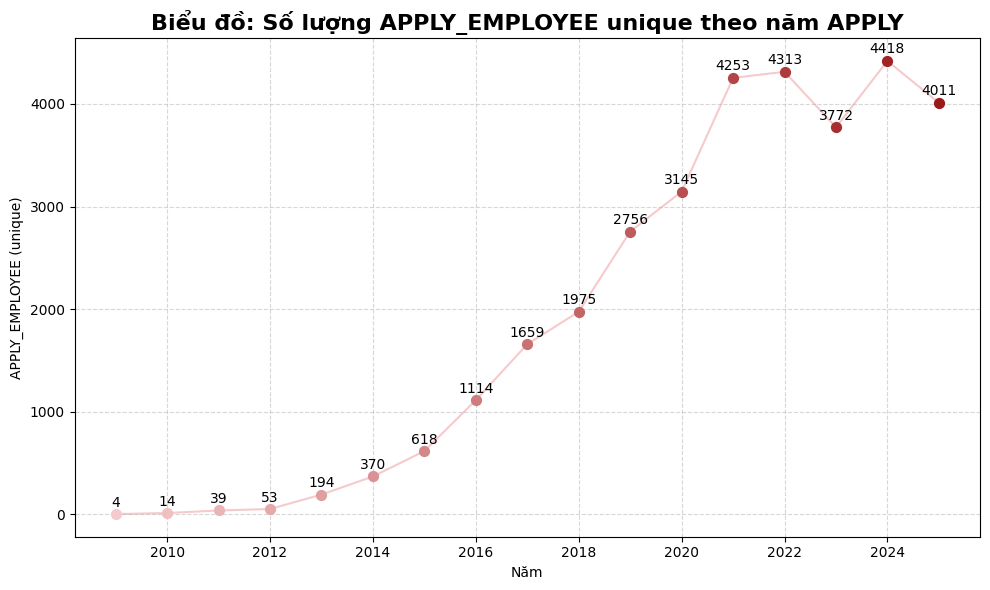

In [18]:
# Làm sạch tên cột (nếu cần)
contract_df.columns = contract_df.columns.str.strip().str.upper()

# Chuyển APPLY_CONTRACT_TIME thành datetime (nếu chưa)
contract_df['APPLY_CONTRACT_TIME'] = pd.to_datetime(contract_df['APPLY_CONTRACT_TIME'], errors='coerce')

# Trích xuất NĂM
contract_df['YEAR'] = contract_df['APPLY_CONTRACT_TIME'].dt.year

# Đếm số khách hàng duy nhất theo từng năm
yearly_employee_apply = contract_df.groupby('YEAR')['APPLY_EMPLOYEE'].nunique()

# Tạo bảng màu
cmap = LinearSegmentedColormap.from_list("custom_reds", ['#F6CACC', '#9C191B'])
colors = cmap(np.linspace(0, 1, len(yearly_employee_apply)))
label_padding = max(yearly_employee_apply.values) * 0.01

# Vẽ line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_employee_apply.index, yearly_employee_apply.values, color='#F6CACC', linewidth=1.5, zorder=1)

# Thêm chấm và nhãn giá trị
for (x, y, color) in zip(yearly_employee_apply.index, yearly_employee_apply.values, colors):
    plt.scatter(x, y, color=color, s=50, zorder=2)
    plt.text(x, y + label_padding, f'{y:}', ha='center', va='bottom', fontsize=10)

# Tùy chỉnh biểu đồ
plt.title('Biểu đồ: Số lượng APPLY_EMPLOYEE unique theo năm APPLY', fontsize=16, fontweight='bold')
plt.xlabel('Năm')
plt.ylabel('APPLY_EMPLOYEE (unique)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


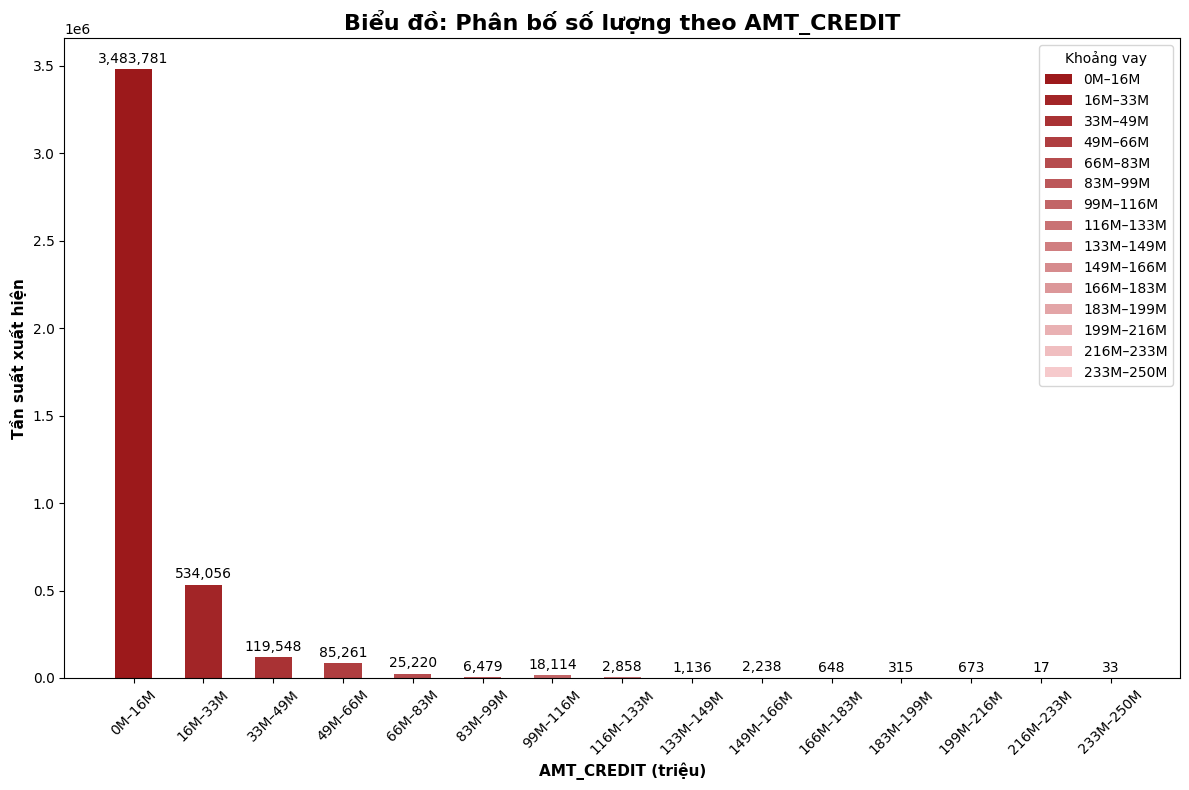

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Làm sạch tên cột
contract_df.columns = contract_df.columns.str.strip().str.upper()

# Chia AMT_CREDIT thành 10 khoảng đều nhau
contract_df['AMT_CREDIT_BIN'] = pd.cut(contract_df['AMT_CREDIT'], bins=15)

# Đếm số lần xuất hiện của mỗi bin
amt_credit_bin_counts = contract_df['AMT_CREDIT_BIN'].value_counts().sort_index()

# Lấy labels và values
labels = [f"{int(b.left/1_000_000)}M–{int(b.right/1_000_000)}M" for b in amt_credit_bin_counts.index]
values = amt_credit_bin_counts.values
x = np.arange(len(labels)) * 0.15

# Tạo bảng màu
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(values)))
labels_with_values = [f'{val:,}' for val in values]

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
bars = plt.bar(x, values, color=colors, width=0.08)

# Chú thích
plt.legend(bars, labels, title="Khoảng vay", loc="best")
plt.xticks(x, labels, rotation=45)
plt.xlabel('AMT_CREDIT (triệu)', fontsize=11, fontweight='bold')
plt.ylabel('Tần suất xuất hiện', fontsize=11, fontweight='bold')
plt.title('Biểu đồ: Phân bố số lượng theo AMT_CREDIT', fontsize=16, fontweight='bold')

# Gắn nhãn số
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=10)

plt.tight_layout()
plt.show()


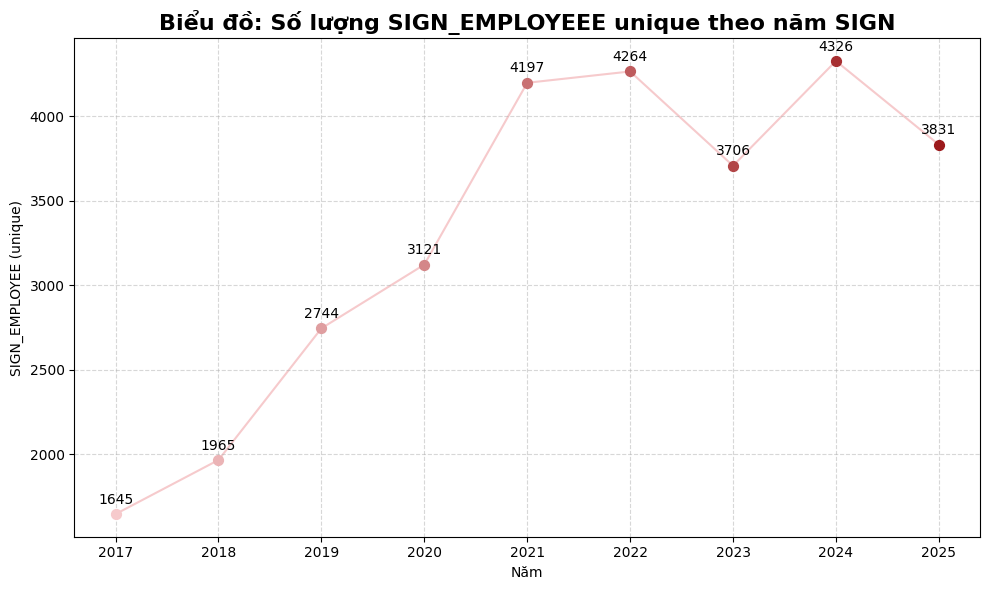

In [20]:
# Làm sạch tên cột (nếu cần)
contract_df.columns = contract_df.columns.str.strip().str.upper()

# Chuyển SIGN_CONTRACT_TIME thành datetime (nếu chưa)
contract_df['SIGN_CONTRACT_TIME'] = pd.to_datetime(contract_df['SIGN_CONTRACT_TIME'], errors='coerce')

# Trích xuất NĂM
contract_df['YEAR'] = contract_df['SIGN_CONTRACT_TIME'].dt.year

# Đếm số khách hàng duy nhất theo từng năm
yearly_employee_sign = contract_df.groupby('YEAR')['SIGN_EMPLOYEE'].nunique()

# Tạo bảng màu
cmap = LinearSegmentedColormap.from_list("custom_reds", ['#F6CACC', '#9C191B'])
colors = cmap(np.linspace(0, 1, len(yearly_employee_sign)))
label_padding = max(yearly_employee_sign.values) * 0.01

# Vẽ line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_employee_sign.index, yearly_employee_sign.values, color='#F6CACC', linewidth=1.5, zorder=1)

# Thêm chấm và nhãn giá trị
for (x, y, color) in zip(yearly_employee_sign.index, yearly_employee_sign.values, colors):
    plt.scatter(x, y, color=color, s=50, zorder=2)
    plt.text(x, y + label_padding, f'{y:}', ha='center', va='bottom', fontsize=10)

# Tùy chỉnh biểu đồ
plt.title('Biểu đồ: Số lượng SIGN_EMPLOYEEE unique theo năm SIGN', fontsize=16, fontweight='bold')
plt.xlabel('Năm')
plt.ylabel('SIGN_EMPLOYEE (unique)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1.1.8 `FIRST_DUE`, `SECOND_DUE`, `THIRD_DUE`, `FOURTH_DUE`

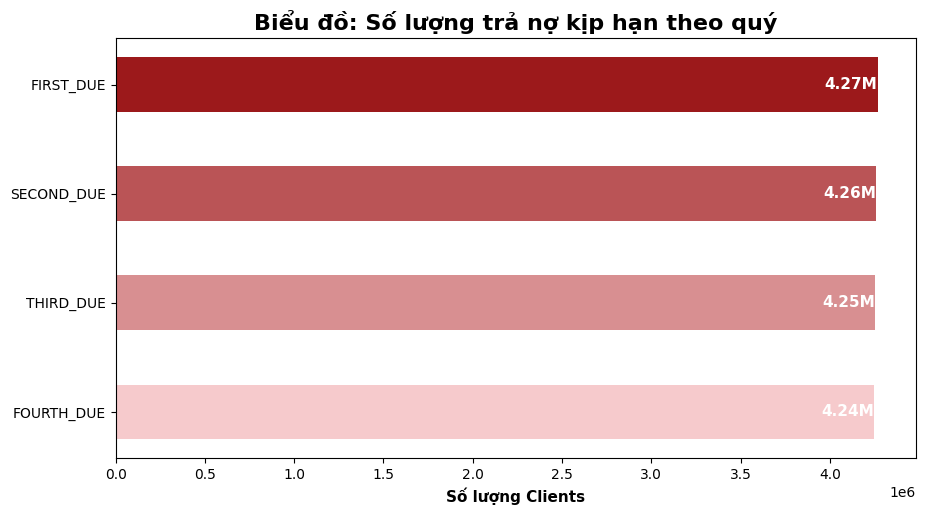

In [21]:
# Danh sách các cột cần đếm số 0
due_cols = ['FIRST_DUE', 'SECOND_DUE', 'THIRD_DUE', 'FOURTH_DUE']
zero_counts = (contract_df[due_cols] == 0).sum()

# Create palette
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(zero_counts)))

# Draw bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(zero_counts.index, zero_counts.values, color=colors, height=0.5)

# Invert the Y-axis so the top category appears at the top
plt.gca().invert_yaxis()
plt.title('Biểu đồ: Số lượng trả nợ kịp hạn theo quý', fontsize=16, fontweight='bold')
plt.xlabel('Số lượng Clients', fontsize=11, fontweight='bold')

# Add data labels
for bar in bars:
    value = int(bar.get_width())
    label = f'{value/1000000:.2f}M' if value >= 1000 else str(value)
    plt.text(
        value, 
        bar.get_y() + bar.get_height()/2, 
        label, 
        ha='right', 
        va='center', 
        fontsize=11,
        color='w', 
        fontweight='bold'
        )

# Optimize spacing so labels and title
plt.tight_layout()
plt.subplots_adjust(top=0.8, bottom=0.1, left=0.2, right=1)

plt.show()


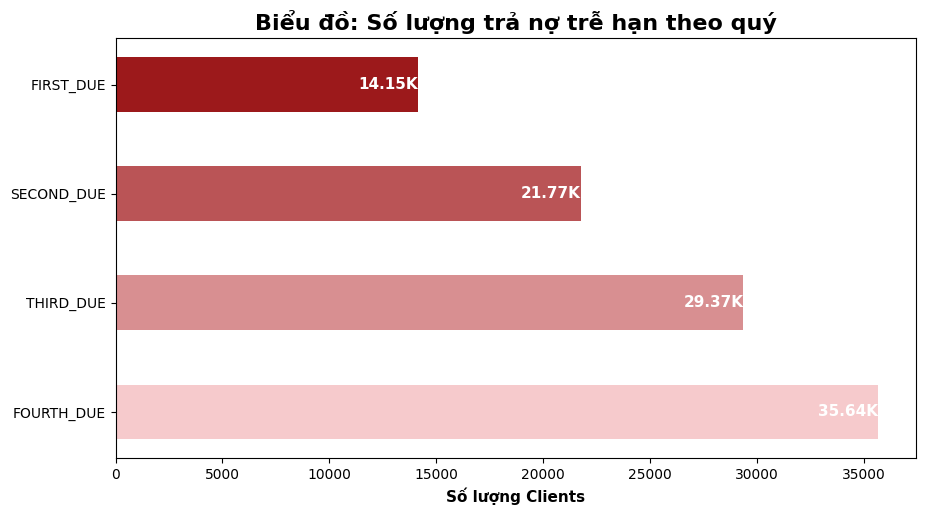

In [22]:
# Danh sách các cột cần đếm số 1
due_cols = ['FIRST_DUE', 'SECOND_DUE', 'THIRD_DUE', 'FOURTH_DUE']
zero_counts = (contract_df[due_cols] == 1).sum()

# Create palette
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(zero_counts)))

# Draw bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(zero_counts.index, zero_counts.values, color=colors, height=0.5)

# Invert the Y-axis so the top category appears at the top
plt.gca().invert_yaxis()
plt.title('Biểu đồ: Số lượng trả nợ trễ hạn theo quý', fontsize=16, fontweight='bold')
plt.xlabel('Số lượng Clients', fontsize=11, fontweight='bold')

# Add data labels
for bar in bars:
    value = int(bar.get_width())
    label = f'{value/1000:.2f}K' if value >= 1000 else str(value)
    plt.text(
        value, 
        bar.get_y() + bar.get_height()/2, 
        label, 
        ha='right', 
        va='center', 
        fontsize=11,
        color='w', 
        fontweight='bold'
        )

# Optimize spacing so labels and title
plt.tight_layout()
plt.subplots_adjust(top=0.8, bottom=0.1, left=0.2, right=1)

plt.show()


##### 1.1.9 `FLAG_INS`

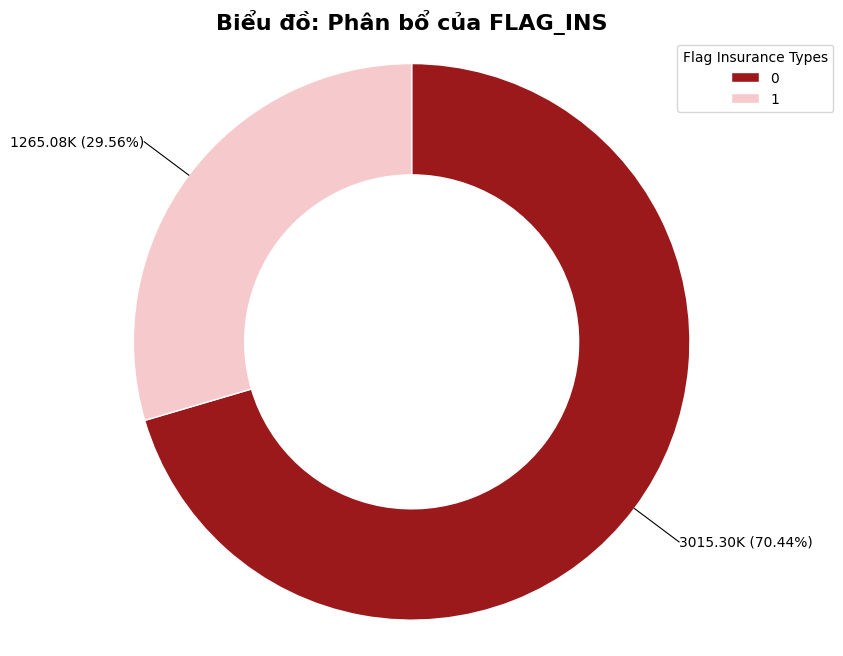

In [23]:
# Lấy danh sách labels từ dữ liệu ban đầu
labels = contract_df['FLAG_INS'].dropna().unique().tolist()

# Đưa 'unknown' về cuối nếu có
ordered_labels = [l for l in labels if l != 'unknown'] + (['unknown'] if 'unknown' in labels else [])

# Đếm số lượng từng nhóm FLAG_INS, sắp xếp theo ordered_labels
flag_ins_counts = contract_df['FLAG_INS'].value_counts().reindex(ordered_labels).fillna(0)

# Tính tổng và phần trăm
total = flag_ins_counts.sum()
percentages = flag_ins_counts / total * 100
labels_with_values = [
    f'{count/1000:.2f}K ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(flag_ins_counts, percentages)
]

# Tạo màu cho từng nhóm (tùy chỉnh theo nhu cầu)
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(flag_ins_counts)))

# Vẽ pie chart
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    flag_ins_counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Vẽ đường nối và label ngoài
outer_radius = 1
for i, (wedge, label) in enumerate(zip(wedges, labels_with_values)):
    if label == '':
        continue 

    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)

    x_end = 1.2 * outer_radius * np.cos(angle_rad)
    y_end = 1.2 * outer_radius * np.sin(angle_rad)

    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'

    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Thêm chú thích
ax.legend(
    wedges,
    ordered_labels,
    title="Flag Insurance Types",
    loc="upper right",
    bbox_to_anchor=(1.2, 1)
)

ax.set_title('Biểu đồ: Phân bổ của FLAG_INS', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


#### **1.2. Customer Table**

##### 1.2.1 `BIRTH_DATE` - AGE

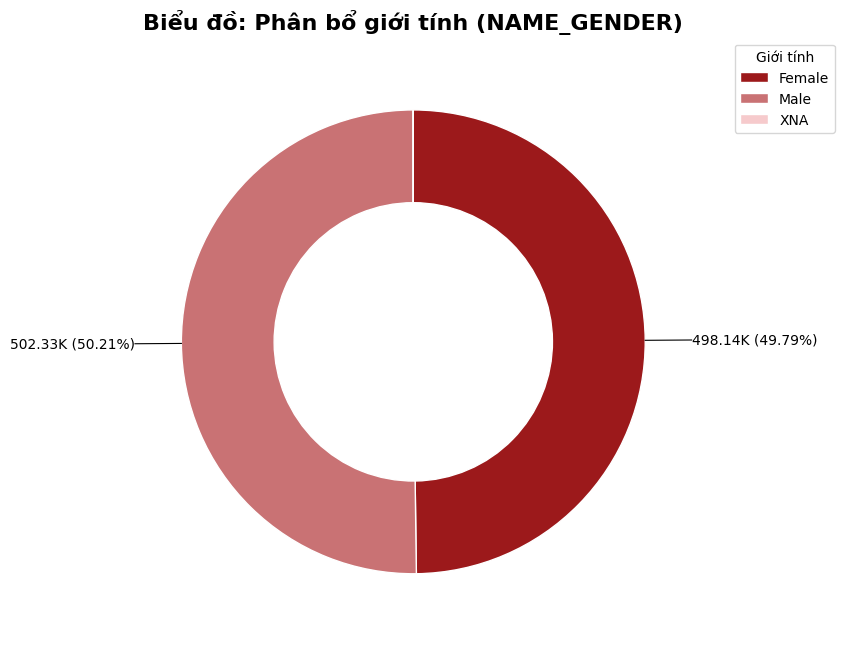

In [24]:
# Bước 1: Merge NAME_GENDER từ customer_df vào contract_df theo SKP_CLIENT
gender_df = customer_df[['SKP_CLIENT', 'NAME_GENDER']].copy()


# Bước 2: Dùng NAME_GENDER thay cho FLAG_INS
labels = gender_df['NAME_GENDER'].dropna().unique().tolist()
ordered_labels = [l for l in labels if l != 'unknown'] + (['unknown'] if 'unknown' in labels else [])
gender_counts = gender_df['NAME_GENDER'].value_counts().reindex(ordered_labels).fillna(0)

# Tính tổng và phần trăm
total = gender_counts.sum()
percentages = gender_counts / total * 100
labels_with_values = [
    f'{count/1000:.2f}K ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(gender_counts, percentages)
]

# Tạo màu
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(gender_counts)))

# Vẽ biểu đồ tròn
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    gender_counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Đường nối và nhãn ngoài
outer_radius = 1
for i, (wedge, label) in enumerate(zip(wedges, labels_with_values)):
    if label == '':
        continue

    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)
    x_end = 1.2 * x_start
    y_end = 1.2 * y_start
    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'

    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Thêm chú thích
ax.legend(
    wedges,
    ordered_labels,
    title="Giới tính",
    loc="upper right",
    bbox_to_anchor=(1.2, 1)
)

ax.set_title('Biểu đồ: Phân bổ giới tính (NAME_GENDER)', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


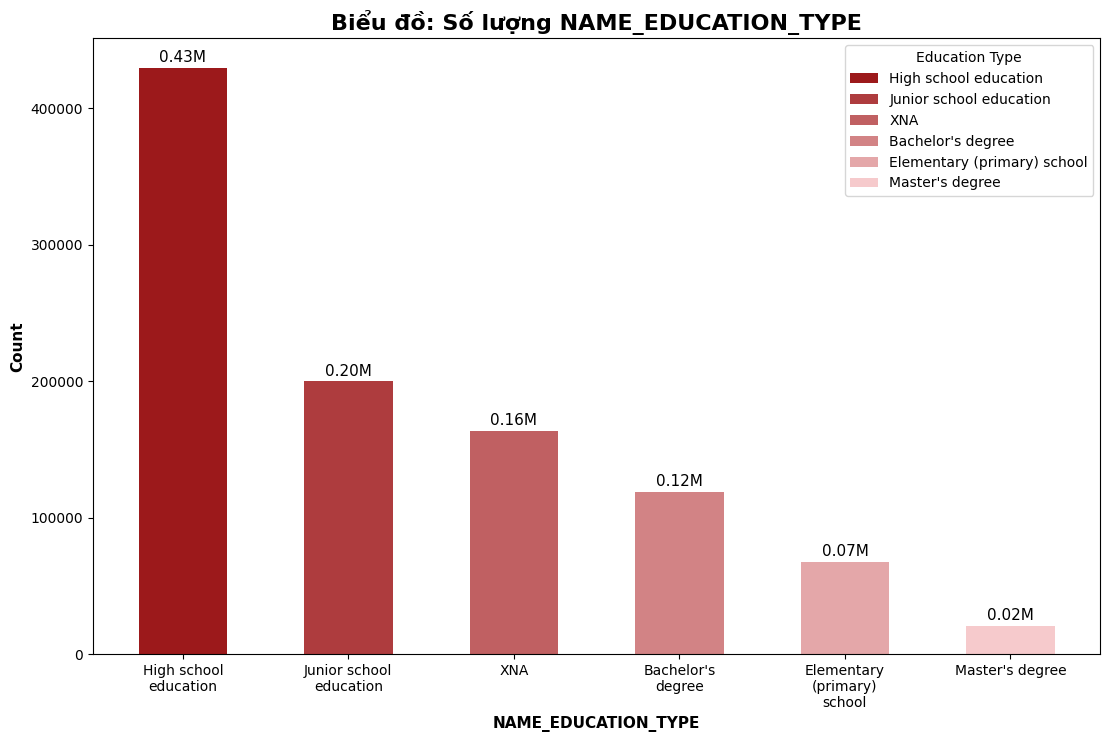

In [25]:
import textwrap

# Count the number of occurrences for each category in 'NAME_CREDIT_STATUS'
education_type_counts = customer_df['NAME_EDUCATION_TYPE'].value_counts()
labels = education_type_counts.index
values = education_type_counts.values

# Bọc nhãn trục X nếu quá dài
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]

# Tính tổng và tạo nhãn định dạng "xxxM"
total = education_type_counts.sum()
labels_with_values = [
    f'{count / 1_000_000:.2f}M' for count in values
]

# Create positions for the bars
x = np.arange(len(labels)) * 0.15

# Create palette (sửa lại biến chính xác theo education_type_counts)
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(education_type_counts)))

# Draw bar chart
plt.figure(figsize=(13, 8))
bars = plt.bar(
    x,
    values,
    color=colors,
    width=0.08,
)

# Add a legend
plt.legend(
    bars,
    labels,  # legend giữ nhãn gốc (không xuống dòng)
    title="Education Type",
    loc="best"
)

# Set nhãn trục X đã được wrap
plt.xticks(x, wrapped_labels)

plt.xlabel('NAME_EDUCATION_TYPE', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.title('Biểu đồ: Số lượng NAME_EDUCATION_TYPE', fontsize=16, fontweight='bold')

# Add custom labels above each bar
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=11)

plt.show()


In [26]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import LinearSegmentedColormap

# # Bước 1: Merge AGE_CUSTOMER_GROUP từ customer_df vào contract_df theo SKP_CLIENT
# age_df = customer_df[['SKP_CLIENT', 'AGE_CUSTOMER_GROUP']].copy()

# # Bước 2: Dùng AGE_CUSTOMER_GROUP thay cho NAME_GENDER
# labels = age_df['AGE_CUSTOMER_GROUP'].dropna().unique().tolist()
# ordered_labels = [l for l in labels if l.lower() != 'unknown'] + (['unknown'] if 'unknown' in [x.lower() for x in labels] else [])
# age_counts = age_df['AGE_CUSTOMER_GROUP'].value_counts().reindex(ordered_labels).fillna(0)

# # Tính tổng và phần trăm
# total = age_counts.sum()
# percentages = age_counts / total * 100
# labels_with_values = [
#     f'{count/1000:.2f}K ({pct:.2f}%)' if pct >= 0.5 else ''
#     for count, pct in zip(age_counts, percentages)
# ]

# # Tạo màu
# colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(age_counts)))

# # Vẽ biểu đồ tròn
# fig, ax = plt.subplots(figsize=(7.9, 7.9))
# wedges, texts = ax.pie(
#     age_counts,
#     startangle=90,
#     counterclock=False,
#     colors=colors,
#     wedgeprops=dict(width=0.4, edgecolor='w')
# )

# # Đường nối và nhãn ngoài
# outer_radius = 1
# for i, (wedge, label) in enumerate(zip(wedges, labels_with_values)):
#     if label == '':
#         continue

#     angle = (wedge.theta2 + wedge.theta1) / 2
#     angle_rad = np.deg2rad(angle)
#     x_start = outer_radius * np.cos(angle_rad)
#     y_start = outer_radius * np.sin(angle_rad)
#     x_end = 1.2 * x_start
#     y_end = 1.2 * y_start
#     x_label = 1.35 * np.cos(angle_rad)
#     y_label = 1.35 * np.sin(angle_rad)
#     ha = 'left' if x_label >= 0 else 'right'

#     ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
#     ax.text(x_end, y_end, label, ha=ha, va='center')

# # Thêm chú thích
# ax.legend(
#     wedges,
#     ordered_labels,
#     title="Nhóm tuổi",
#     loc="upper right",
#     bbox_to_anchor=(1.2, 1)
# )

# ax.set_title('Biểu đồ: Phân bổ theo nhóm tuổi (AGE_CUSTOMER_GROUP)', fontsize=16, fontweight='bold')
# ax.axis('equal')
# plt.show()


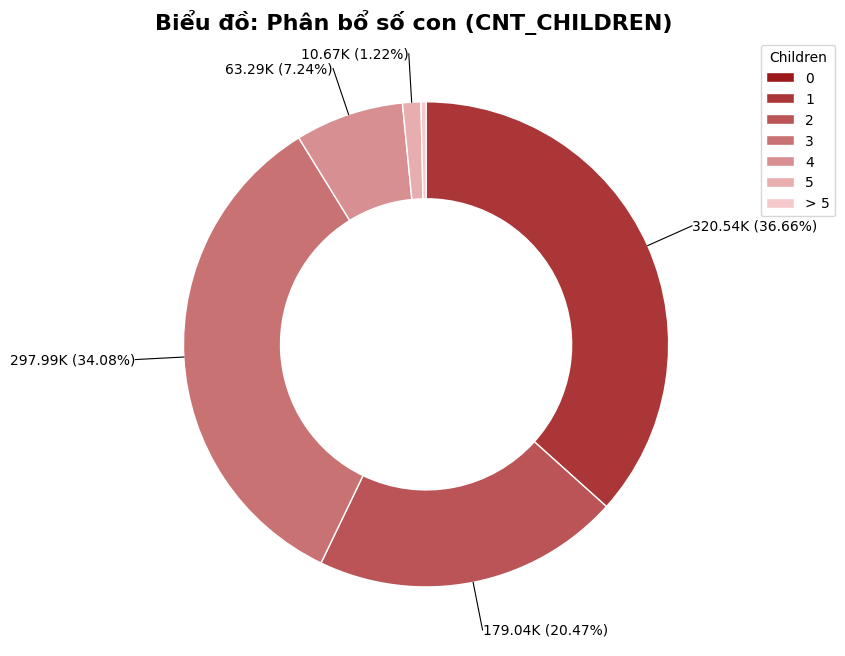

In [27]:
# Loại bỏ giá trị âm
customer_df = customer_df[customer_df['CNT_CHILDREN'] >= 0]

# Định nghĩa các nhóm CNT_CHILDREN
bins = [0, 1, 2, 3, 4, 5, 100]  # 100 để bao toàn bộ giá trị >5
labels = ['0', '1', '2', '3', '4', '5', '> 5']

# Phân nhóm số con
customer_df['CNT_CHILDREN_GROUP'] = pd.cut(
    customer_df['CNT_CHILDREN'],
    bins=[-0.1, 0, 1, 2, 3, 4, 5, np.inf],
    labels=pd.Categorical(['0', '1', '2', '3', '4', '5', '> 5'], ordered=True),
    right=False
)

# Đếm số lượng trong từng nhóm
cnt_children_counts = customer_df['CNT_CHILDREN_GROUP'].value_counts().reindex(labels)

# Tính phần trăm và nhãn
total = cnt_children_counts.sum()
percentages = cnt_children_counts / total * 100
labels_with_values = [
    f'{count/1000:.2f}K ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(cnt_children_counts, percentages)
]

# Màu sắc
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(cnt_children_counts))
)

# Vẽ biểu đồ tròn
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    cnt_children_counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Gắn nhãn bên ngoài
outer_radius = 1
for wedge, label in zip(wedges, labels_with_values):
    if label == '':
        continue
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)
    x_end = 1.2 * x_start
    y_end = 1.2 * y_start
    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'
    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Chú thích
ax.legend(
    wedges,
    labels,
    title="Children",
    loc="upper right",
    bbox_to_anchor=(1.2, 1)
)

ax.set_title('Biểu đồ: Phân bổ số con (CNT_CHILDREN)', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


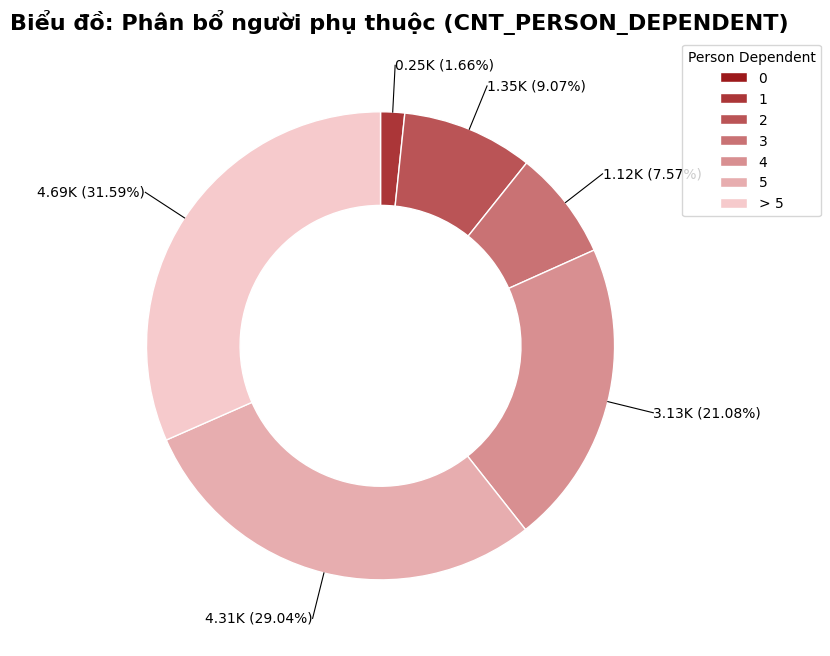

In [28]:
# Loại bỏ giá trị âm
customer_df = customer_df[customer_df['CNT_PERSON_DEPENDENT'] >= 0]

# Định nghĩa các nhóm CNT_PERSON_DEPENDENT
bins = [0, 1, 2, 3, 4, 5, 100]  
labels = ['0', '1', '2', '3', '4', '5', '> 5']

# Phân nhóm số con
customer_df['CNT_PERSON_DEPENDENT_GROUP'] = pd.cut(
    customer_df['CNT_PERSON_DEPENDENT'],
    bins=[-0.1, 0, 1, 2, 3, 4, 5, np.inf],
    labels=pd.Categorical(['0', '1', '2', '3', '4', '5', '> 5'], ordered=True),
    right=False
)

# Đếm số lượng trong từng nhóm
cnt_person_dependent_counts = customer_df['CNT_PERSON_DEPENDENT_GROUP'].value_counts().reindex(labels)

# Tính phần trăm và nhãn
total = cnt_person_dependent_counts.sum()
percentages = cnt_person_dependent_counts / total * 100
labels_with_values = [
    f'{count/1000:.2f}K ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(cnt_person_dependent_counts, percentages)
]

# Màu sắc
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(cnt_person_dependent_counts))
)

# Vẽ biểu đồ tròn
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    cnt_person_dependent_counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Gắn nhãn bên ngoài
outer_radius = 1
for wedge, label in zip(wedges, labels_with_values):
    if label == '':
        continue
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)
    x_end = 1.2 * x_start
    y_end = 1.2 * y_start
    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'
    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Chú thích
ax.legend(
    wedges,
    labels,
    title="Person Dependent",
    loc="upper right",
    bbox_to_anchor=(1.2, 1)
)

ax.set_title('Biểu đồ: Phân bổ người phụ thuộc (CNT_PERSON_DEPENDENT)', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


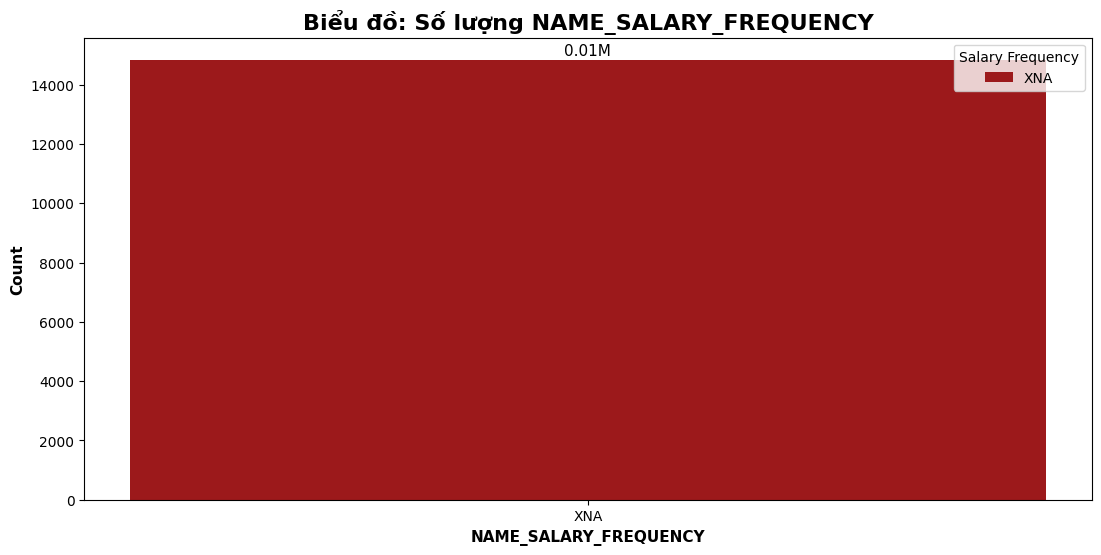

In [29]:
import textwrap

# Count the number of occurrences for each category in 'NAME_SALARY_FREQUENCY'
status_counts = customer_df['NAME_SALARY_FREQUENCY'].value_counts()
labels = status_counts.index
values = status_counts.values

# Bọc nhãn trục X nếu quá dài
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]

# Tính tổng và tạo nhãn định dạng "xxxM"
total = status_counts.sum()
labels_with_values = [
    f'{count / 1_000_000:.2f}M' for count in values
]

# Create positions for the bars
x = np.arange(len(labels)) * 0.15

# Create palette
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(status_counts))
)

# Draw bar chart
plt.figure(figsize=(13, 6))
bars = plt.bar(
    x,
    values,
    color=colors,
    width=0.08,
)

# Add a legend
plt.legend(
    bars,
    labels,  # legend giữ nhãn gốc (không xuống dòng)
    title="Salary Frequency",
    loc="best"
)

# Set nhãn trục X đã được wrap
plt.xticks(x, wrapped_labels)

plt.xlabel('NAME_SALARY_FREQUENCY', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.title('Biểu đồ: Số lượng NAME_SALARY_FREQUENCY', fontsize=16, fontweight='bold')

# Add custom labels above each bar
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=11)

plt.show()


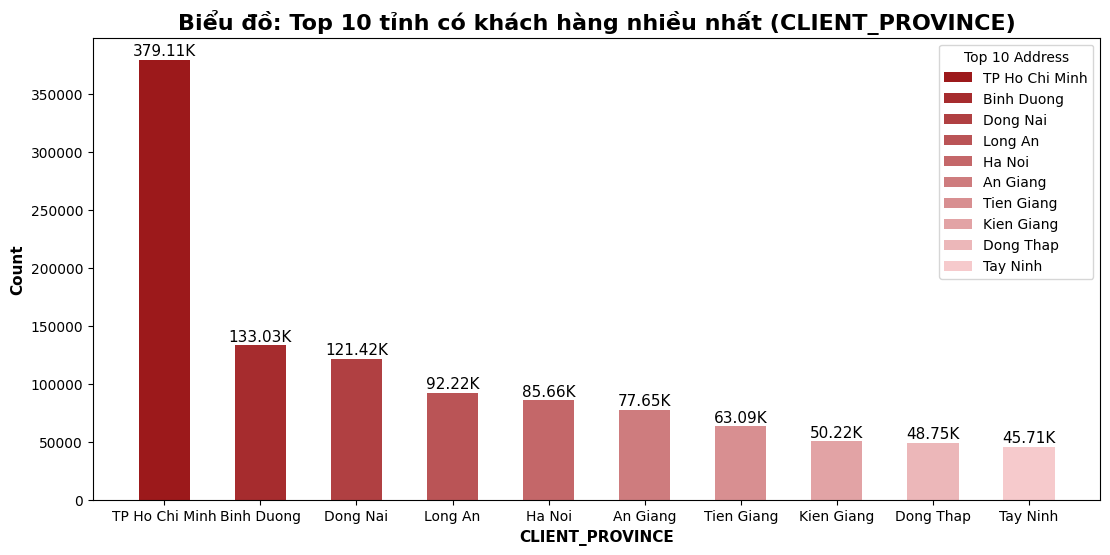

In [30]:
# Lấy top 10 giá trị xuất hiện nhiều nhất trong 'CLIENT_PROVINCE'
merge_df = leads_df.merge(shop_df, how='left', on='CODE_POS')
client_province_counts = merge_df['SALESROOM_PROVINCE'].value_counts().head(10)
labels = client_province_counts.index
values = client_province_counts.values

# Bọc nhãn trục X nếu quá dài
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]

# Tính tổng và tạo nhãn định dạng "xxxM"
total = client_province_counts.sum()
labels_with_values = [
    f'{count / 1_000:.2f}K' for count in values
]

# Tạo vị trí cho các cột
x = np.arange(len(labels)) * 0.15

# Tạo bảng màu
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(client_province_counts))
)

# Vẽ biểu đồ cột
plt.figure(figsize=(13, 6))
bars = plt.bar(
    x,
    values,
    color=colors,
    width=0.08,
)

# Thêm chú thích
plt.legend(
    bars,
    labels,  # legend giữ nhãn gốc (không xuống dòng)
    title="Top 10 Address",
    loc="best"
)

# Gắn nhãn trục X
plt.xticks(x, wrapped_labels)
plt.xlabel('CLIENT_PROVINCE', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.title('Biểu đồ: Top 10 tỉnh có khách hàng nhiều nhất (CLIENT_PROVINCE)', fontsize=16, fontweight='bold')

# Gắn nhãn số liệu trên đầu cột
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=11)

plt.show()

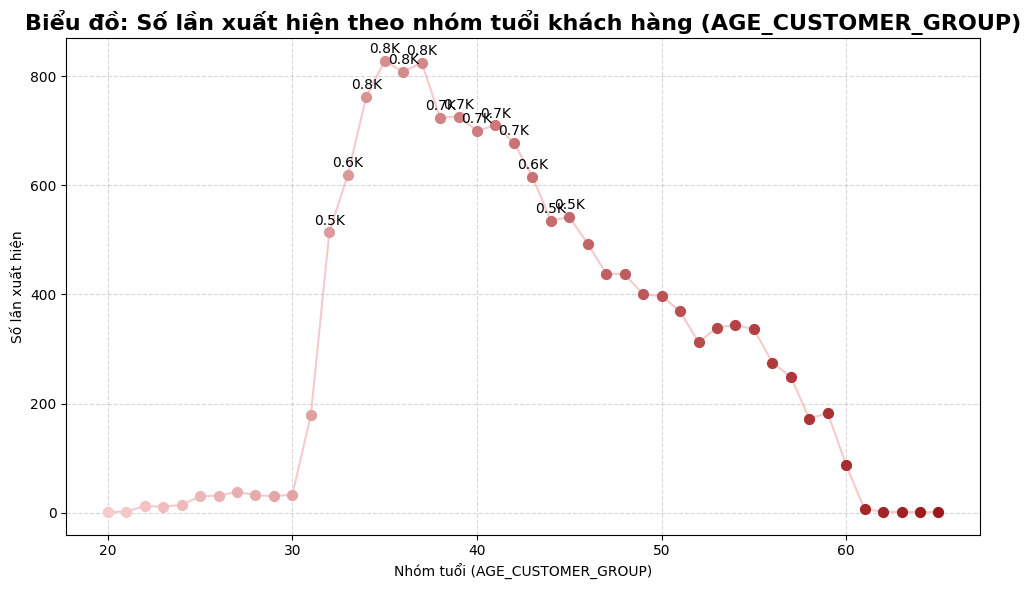

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Làm sạch tên cột (nếu cần)
customer_df.columns = customer_df.columns.str.strip().str.upper()

# Đếm số lượng theo AGE_CUSTOMER_GROUP
age_group_counts = customer_df['AGE_CLIENT'].value_counts().sort_index()  # giữ đúng thứ tự nhóm

# Tạo bảng màu
cmap = LinearSegmentedColormap.from_list("custom_reds", ['#F6CACC', '#9C191B'])
colors = cmap(np.linspace(0, 1, len(age_group_counts)))
label_padding = max(age_group_counts.values) * 0.01

# Vẽ line chart
plt.figure(figsize=(10, 6))
plt.plot(age_group_counts.index, age_group_counts.values, color='#F6CACC', linewidth=1.5, zorder=1)

# Thêm chấm và nhãn giá trị
for (x, y, color) in zip(age_group_counts.index, age_group_counts.values, colors):
    plt.scatter(x, y, color=color, s=50, zorder=2)
    plt.text(x, y + label_padding, f'{y/1000:.1f}K', ha='center', va='bottom', fontsize=10) if  y >= 500 else ''

# Tùy chỉnh biểu đồ
plt.title('Biểu đồ: Số lần xuất hiện theo nhóm tuổi khách hàng (AGE_CUSTOMER_GROUP)', fontsize=16, fontweight='bold')
plt.xlabel('Nhóm tuổi (AGE_CUSTOMER_GROUP)')
plt.ylabel('Số lần xuất hiện')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


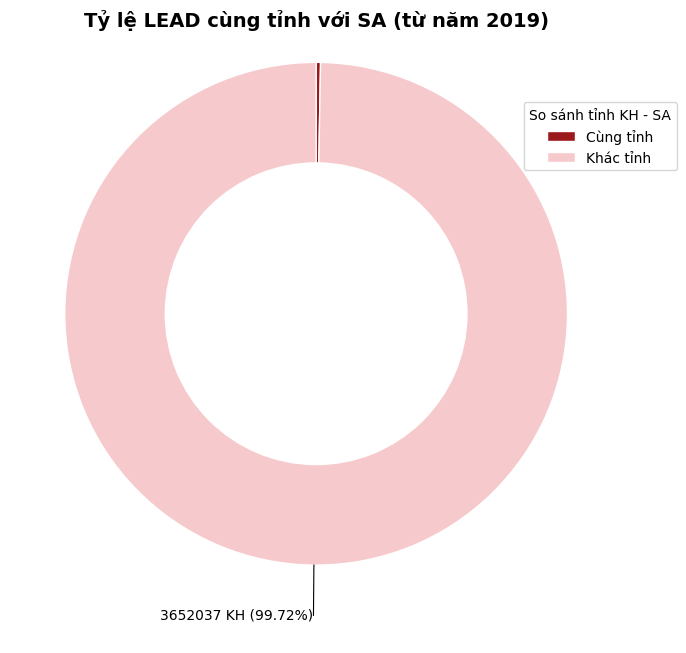

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Bước 0: Chuyển đổi thời gian (nếu cần)
contract_df['APPLY_CONTRACT_TIME'] = pd.to_datetime(contract_df['APPLY_CONTRACT_TIME'], errors='coerce')

# Bước 1: Lọc từ năm 2019 trở đi
contract_filtered = contract_df[contract_df['APPLY_CONTRACT_TIME'].dt.year >= 2019]

# Bước 2: Lọc distinct theo SKP_CREDIT_CASE
contract_unique = contract_filtered.drop_duplicates(subset='SKP_CREDIT_CASE')

# Bước 3: Merge thông tin khách và nhân viên
contract_merge = contract_unique.merge(
    customer_df[['SKP_CLIENT', 'CLIENT_PROVINCE']],
    how='left', on='SKP_CLIENT'
)

contract_merge = contract_merge.merge(
    employee_df[['CODE_EMPLOYEE', 'SA_PROVINCE']],
    how='left', left_on='APPLY_EMPLOYEE', right_on='CODE_EMPLOYEE'
)

# Bước 4: So sánh tỉnh
contract_merge['SAME_PROVINCE'] = contract_merge['CLIENT_PROVINCE'] == contract_merge['SA_PROVINCE']

# Bước 5: Đếm số lượng
counts = contract_merge['SAME_PROVINCE'].value_counts().rename({True: 'Cùng tỉnh', False: 'Khác tỉnh'})
counts = counts.reindex(['Cùng tỉnh', 'Khác tỉnh'], fill_value=0)

# Bước 6: Tính phần trăm và gắn nhãn
total = counts.sum()
percentages = counts / total * 100
labels = counts.index.tolist()
labels_with_values = [
    f'{count:.0f} KH ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(counts, percentages)
]

# Màu sắc
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(counts))
)

# Bước 7: Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Gắn nhãn ngoài
outer_radius = 1
for wedge, label in zip(wedges, labels_with_values):
    if label == '':
        continue
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)
    x_end = 1.2 * x_start
    y_end = 1.2 * y_start
    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'
    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Legend + tiêu đề
ax.legend(
    wedges,
    labels,
    title="So sánh tỉnh KH - SA",
    loc="upper right",
    bbox_to_anchor=(1.1, 0.9)
)

ax.set_title('Tỷ lệ LEAD cùng tỉnh với SA (từ năm 2019)', fontsize=14, fontweight='bold')
ax.axis('equal')
plt.show()

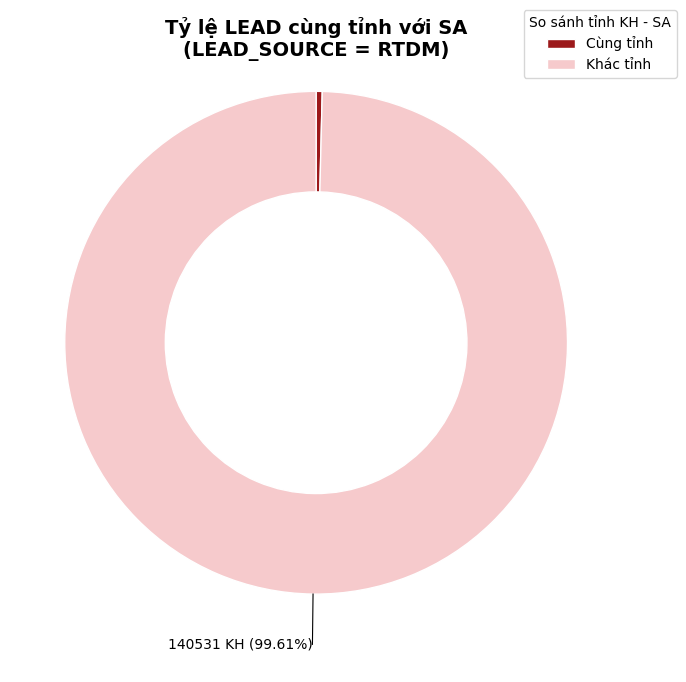

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Bước 1: Merge contract với leads để lọc theo LEAD_SOURCE
contract_with_leads = contract_df.merge(
    leads_df[['SKP_CLIENT', 'LEAD_SOURCE']],
    how='left', on='SKP_CLIENT'
)

# ❌ Bỏ lọc theo thời gian, chỉ giữ điều kiện LEAD_SOURCE = 'SOB'
contract_filtered = contract_with_leads[
    contract_with_leads['LEAD_SOURCE'] =='SOB'
]

# Bước 2: Lọc hợp đồng không trùng theo SKP_CREDIT_CASE
contract_unique = contract_filtered.drop_duplicates(subset='SKP_CREDIT_CASE')

# Bước 3: Merge thông tin khách và nhân viên
contract_merge = contract_unique.merge(
    customer_df[['SKP_CLIENT', 'CLIENT_PROVINCE']],
    how='left', on='SKP_CLIENT'
)

contract_merge = contract_merge.merge(
    employee_df[['CODE_EMPLOYEE', 'SA_PROVINCE']],
    how='left', left_on='APPLY_EMPLOYEE', right_on='CODE_EMPLOYEE'
)

# Bước 4: So sánh tỉnh
contract_merge['SAME_PROVINCE'] = contract_merge['CLIENT_PROVINCE'] == contract_merge['SA_PROVINCE']

# Bước 5: Thống kê số lượng
counts = contract_merge['SAME_PROVINCE'].value_counts().rename({True: 'Cùng tỉnh', False: 'Khác tỉnh'})
counts = counts.reindex(['Cùng tỉnh', 'Khác tỉnh'], fill_value=0)

# Bước 6: Tính phần trăm và nhãn hiển thị
total = counts.sum()
percentages = counts / total * 100
labels = counts.index.tolist()
labels_with_values = [
    f'{count:.0f} KH ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(counts, percentages)
]

# Màu sắc gradient
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(counts))
)

# Bước 7: Vẽ pie chart nâng cao
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Gắn nhãn ngoài
outer_radius = 1
for wedge, label in zip(wedges, labels_with_values):
    if label == '':
        continue
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)
    x_end = 1.2 * x_start
    y_end = 1.2 * y_start
    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'
    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Legend + tiêu đề
ax.legend(
    wedges,
    labels,
    title="So sánh tỉnh KH - SA",
    loc="upper right",
    bbox_to_anchor=(1.1, 1.1)
)

ax.set_title('Tỷ lệ LEAD cùng tỉnh với SA\n(LEAD_SOURCE = RTDM)', fontsize=14, fontweight='bold')
ax.axis('equal')
plt.show()





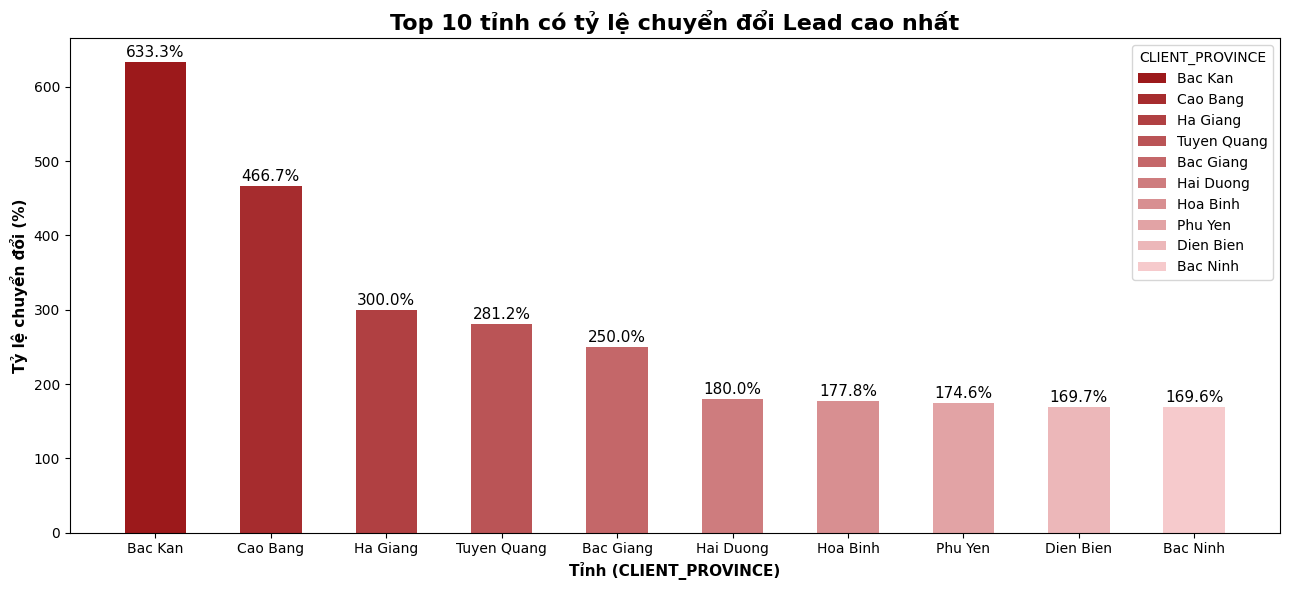

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import textwrap

# Làm sạch dữ liệu hợp đồng
contract_df['SIGN_CONTRACT_TIME'] = pd.to_datetime(contract_df['SIGN_CONTRACT_TIME'], errors='coerce')

# Lọc hợp đồng đã ký
signed_contracts = contract_df[contract_df['SIGN_CONTRACT_TIME'].notna()]
signed_with_province = signed_contracts.merge(customer_df[['SKP_CLIENT', 'CLIENT_PROVINCE']], on='SKP_CLIENT', how='left')
signed_counts = signed_with_province['CLIENT_PROVINCE'].value_counts()

# Tính số lead theo tỉnh
leads_with_province = leads_df.merge(customer_df[['SKP_CLIENT', 'CLIENT_PROVINCE']], on='SKP_CLIENT', how='left')
lead_counts = leads_with_province['CLIENT_PROVINCE'].value_counts()

# Tính tỷ lệ chuyển đổi
conversion_rate = (signed_counts / lead_counts).fillna(0) * 100
conversion_rate = conversion_rate[conversion_rate > 0]
conversion_rate = conversion_rate.sort_values(ascending=False).head(10)

# Chuẩn bị dữ liệu vẽ
labels = conversion_rate.index.tolist()
values = conversion_rate.values
wrapped_labels = [textwrap.fill(str(label), width=15) for label in labels]
labels_with_values = [f'{v:.1f}%' for v in values]
x = np.arange(len(labels)) * 0.15
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(labels)))

# Vẽ biểu đồ
plt.figure(figsize=(13, 6))
bars = plt.bar(x, values, color=colors, width=0.08)

plt.legend(bars, labels, title="CLIENT_PROVINCE", loc="best")
plt.xticks(x, wrapped_labels)
plt.xlabel('Tỉnh (CLIENT_PROVINCE)', fontsize=11, fontweight='bold')
plt.ylabel('Tỷ lệ chuyển đổi (%)', fontsize=11, fontweight='bold')
plt.title('Top 10 tỉnh có tỷ lệ chuyển đổi Lead cao nhất', fontsize=16, fontweight='bold')

for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=11)

plt.tight_layout()
plt.show()






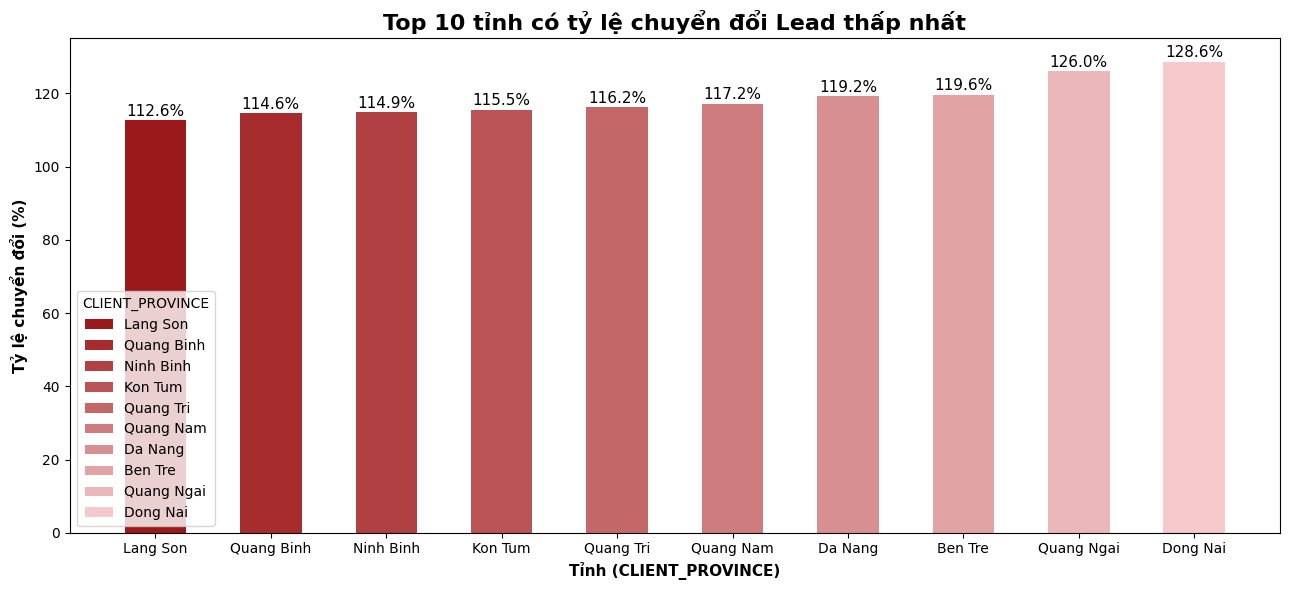

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import textwrap

# Làm sạch dữ liệu
contract_df['SIGN_CONTRACT_TIME'] = pd.to_datetime(contract_df['SIGN_CONTRACT_TIME'], errors='coerce')

# Lọc hợp đồng đã ký
signed_contracts = contract_df[contract_df['SIGN_CONTRACT_TIME'].notna()]
signed_with_province = signed_contracts.merge(
    customer_df[['SKP_CLIENT', 'CLIENT_PROVINCE']], on='SKP_CLIENT', how='left'
)

# Bỏ CLIENT_PROVINCE là 0 hoặc "0"
signed_with_province = signed_with_province[
    (signed_with_province['CLIENT_PROVINCE'].astype(str) != '0') & 
    (signed_with_province['CLIENT_PROVINCE'].notna())
]

# Đếm số hợp đồng đã ký theo tỉnh
signed_counts = signed_with_province['CLIENT_PROVINCE'].value_counts()

# Đếm số lead theo tỉnh (cũng loại bỏ '0')
leads_with_province = leads_df.merge(
    customer_df[['SKP_CLIENT', 'CLIENT_PROVINCE']], on='SKP_CLIENT', how='left'
)
leads_with_province = leads_with_province[
    (leads_with_province['CLIENT_PROVINCE'].astype(str) != '0') &
    (leads_with_province['CLIENT_PROVINCE'].notna())
]
lead_counts = leads_with_province['CLIENT_PROVINCE'].value_counts()

# Tính tỷ lệ chuyển đổi
conversion_rate = (signed_counts / lead_counts).fillna(0) * 100
conversion_rate = conversion_rate[conversion_rate > 0]
conversion_rate = conversion_rate.sort_values(ascending=True).head(10)

# Chuẩn bị dữ liệu vẽ
labels = conversion_rate.index.tolist()
values = conversion_rate.values
wrapped_labels = [textwrap.fill(str(label), width=15) for label in labels]
labels_with_values = [f'{v:.1f}%' for v in values]
x = np.arange(len(labels)) * 0.15
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(labels)))

# Vẽ biểu đồ
plt.figure(figsize=(13, 6))
bars = plt.bar(x, values, color=colors, width=0.08)

plt.legend(bars, labels, title="CLIENT_PROVINCE", loc="best")
plt.xticks(x, wrapped_labels)
plt.xlabel('Tỉnh (CLIENT_PROVINCE)', fontsize=11, fontweight='bold')
plt.ylabel('Tỷ lệ chuyển đổi (%)', fontsize=11, fontweight='bold')
plt.title('Top 10 tỉnh có tỷ lệ chuyển đổi Lead thấp nhất', fontsize=16, fontweight='bold')

for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=11)

plt.tight_layout()
plt.show()


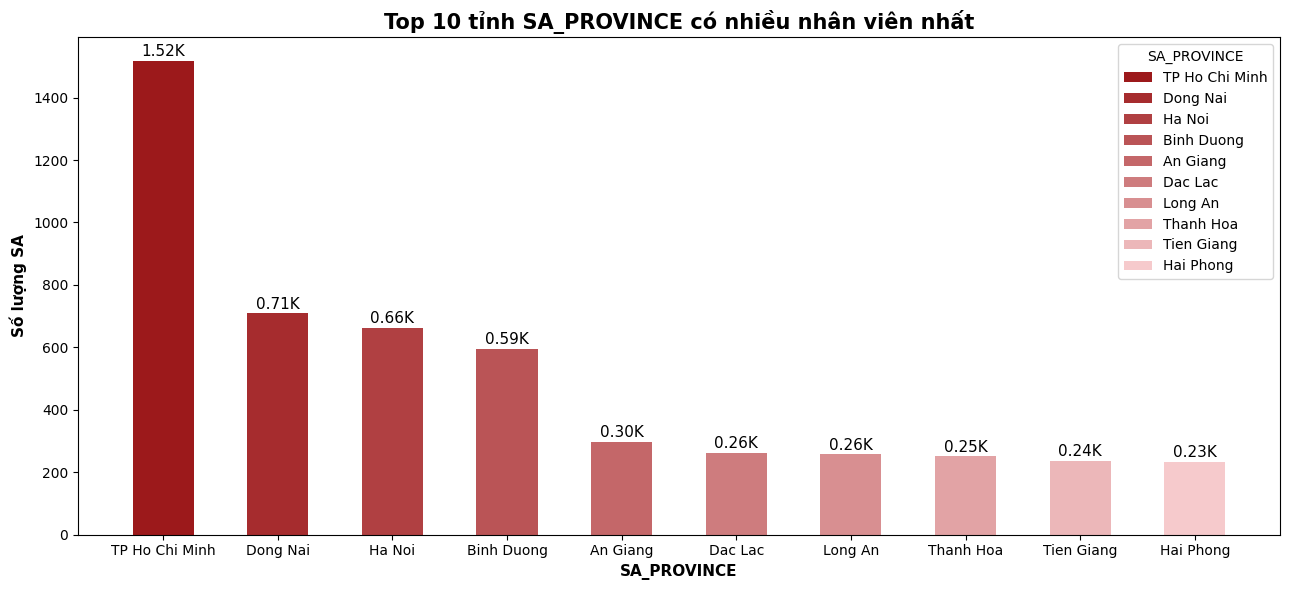

In [36]:
# Đếm số lượng theo SA_PROVINCE
sa_province_counts = employee_df['SA_PROVINCE'].value_counts().head(10)
labels = sa_province_counts.index
values = sa_province_counts.values

# Bọc nhãn trục X nếu quá dài
wrapped_labels = [textwrap.fill(str(label), width=15) for label in labels]

# Định dạng nhãn số liệu
labels_with_values = [f'{count / 1_000:.2f}K' for count in values]

# Tạo vị trí cho cột
x = np.arange(len(labels)) * 0.15

# Bảng màu
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(sa_province_counts))
)

# Vẽ biểu đồ
plt.figure(figsize=(13, 6))
bars = plt.bar(x, values, color=colors, width=0.08)

# Thêm legend
plt.legend(
    bars,
    labels,  # nhãn gốc không xuống dòng
    title="SA_PROVINCE",
    loc="best"
)

# Nhãn trục
plt.xticks(x, wrapped_labels)
plt.xlabel('SA_PROVINCE', fontsize=11, fontweight='bold')
plt.ylabel('Số lượng SA', fontsize=11, fontweight='bold')
plt.title('Top 10 tỉnh SA_PROVINCE có nhiều nhân viên nhất', fontsize=15, fontweight='bold')

# Nhãn số trên mỗi cột
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=11)

plt.tight_layout()
plt.show()
